In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np

In [55]:
import sys
sys.path.append('../')
import nn_train.tools as tools
from nn_train.tools import pa_fields, seven_fields, fields
from nn_train.neural_network import NeuralNetwork

In [3]:
list(os.walk('..'))

[('..',
  ['nn_train',
   '__pycache__',
   'Test',
   'model_metrics',
   'architecture_models',
   '.ipynb_checkpoints',
   'saved_models',
   'By_dates',
   'Data',
   '.git'],
  ['Links.txt', 'New.txt', 'Интересно.txt', '.gitignore']),
 ('../nn_train',
  ['__pycache__', '.ipynb_checkpoints'],
  ['NeuralNetwork_1.ipynb',
   'NeuralNetwork_11_first_layer_tests.ipynb',
   'NeuralNetwork_8_and_group_by.ipynb',
   'NeuralNetwork_14_first_3_layers_25_best_other_fit_methods.ipynb',
   'NeuralNetwork_3.ipynb',
   'NeuralNetwork_2.ipynb',
   'NeuralNetwork_6.ipynb',
   'tools.py',
   '__init__.py',
   'neural_network.py',
   'NeuralNetwork_10_and_metrics.ipynb',
   'NeuralNetwork_7.ipynb',
   'NeuralNetwork_4.ipynb',
   'NeuralNetwork_5.ipynb',
   'NeuralNetwork_9_and_min_max_all_emotions.ipynb',
   'NeuralNetwork_12_first_2_layers_tests.ipynb',
   'NeuralNetwork_13_first_3_layers_tests.ipynb']),
 ('../nn_train/__pycache__',
  [],
  ['neural_network.cpython-38.pyc',
   'tools.cpython-38.pyc

In [4]:
databases = [dir_path for dir_path in os.walk('..') if 'other.db' in dir_path[2]][0]
databases

('../Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [5]:
df = pd.DataFrame()

In [6]:
data_dir = databases[0]
for db_file in databases[2]:
    if db_file in ['clear_emotions.db', 'model_metrics.db']:
        continue
    db_path = os.path.join(data_dir, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)

In [7]:
df

Index_    Video_Time    Neutral        Happy  \
0         00:00:00.000_Керов Андрей_3  00:00:00.000  0.9878594  0.003336495   
1         00:00:00.030_Керов Андрей_3  00:00:00.030  0.9878824  0.003385304   
2         00:00:00.060_Керов Андрей_3  00:00:00.060  0.9879055  0.003434114   
3         00:00:00.090_Керов Андрей_3  00:00:00.090  0.9879286  0.003482923   
4         00:00:00.121_Керов Андрей_3  00:00:00.121  0.9880258  0.003506238   
...                               ...           ...        ...          ...   
20842  00:01:51.700_Куликов Алексей_1  00:01:51.700  0.9315634   3.7894e-05   
20843  00:01:51.800_Куликов Алексей_1  00:01:51.800  0.9356429   3.1707e-05   
20844  00:01:51.900_Куликов Алексей_1  00:01:51.900  0.9384109   2.6894e-05   
20845  00:01:52.000_Куликов Алексей_1  00:01:52.000  0.9407817   2.3125e-05   
20846  00:01:52.100_Куликов Алексей_1  00:01:52.100  0.9421062   2.0179e-05   

               Sad        Angry    Surprised       Scared    Disgusted  \
0      0.008397053  0.001824096  0.007600656   6.9452e-05  0.000141165   
1      0.008362157  0.001782566  0.007644675   8.0761e-05  0.000138702   
2      0.008327262  0.001741036  0.007688694    9.207e-05   0.00013624   
3      0.008292366  0.001699506  0.007732714  0.000103379  0.000133777   
4      0.008183754   0.00164466   0.00778434  0.000113112  0.000130297   
...            ...          ...          ...          ...          ...   
20842   0.02397099   0.06796286   0.02635098  0.000250268  0.000691861   
20843    0.0237766   0.06259692   0.02374056  0.000229404  0.000798602   
20844     0.023437   0.05935737   0.02117987  0.000212627  0.000848645   
20845   0.02303489   0.05651735   0.01901644  0.000197417  0.000877875   
20846   0.02311718    0.0544879   0.01772361  0.000184181  0.000897447   

            Valence  ... Action_Unit_12___Right___Lip_Corner_Puller  \
0      -0.005060558  ...                                        0.0   
1      -0.004976853  ...                                        0.0   
2      -0.004893148  ...                                        0.0   
3      -0.004809443  ...                                        0.0   
4      -0.004677515  ...                                        0.0   
...             ...  ...                                        ...   
20842   -0.06792496  ...                                        0.0   
20843   -0.06256521  ...                                        0.0   
20844   -0.05933048  ...                                        0.0   
20845   -0.05649422  ...                                        0.0   
20846   -0.05446772  ...                                        0.0   

      Action_Unit_14___Right___Dimpler  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
...                                ...   
20842                              0.0   
20843                              0.0   
20844                              0.0   
20845                              0.0   
20846                              0.0   

      Action_Unit_15___Right___Lip_Corner_Depressor  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
20842                                           0.0   
20843                                           0.0   
20844                                           0.0   
20845                                           0.0   
20846                                           0.0   

      Action_Unit_20___Right___Lip_Stretcher  \
0                                        0.0   
1                                        0.0   
2                             

In [8]:
tools.make_valid_df(df, fields)

In [9]:
df

Index_    Video_Time  \
Index_                                                                         
00:00:00.000_Керов Андрей_3        00:00:00.000_Керов Андрей_3  00:00:00.000   
00:00:00.030_Керов Андрей_3        00:00:00.030_Керов Андрей_3  00:00:00.030   
00:00:00.060_Керов Андрей_3        00:00:00.060_Керов Андрей_3  00:00:00.060   
00:00:00.090_Керов Андрей_3        00:00:00.090_Керов Андрей_3  00:00:00.090   
00:00:00.121_Керов Андрей_3        00:00:00.121_Керов Андрей_3  00:00:00.121   
...                                                        ...           ...   
00:01:51.700_Куликов Алексей_1  00:01:51.700_Куликов Алексей_1  00:01:51.700   
00:01:51.800_Куликов Алексей_1  00:01:51.800_Куликов Алексей_1  00:01:51.800   
00:01:51.900_Куликов Алексей_1  00:01:51.900_Куликов Алексей_1  00:01:51.900   
00:01:52.000_Куликов Алексей_1  00:01:52.000_Куликов Алексей_1  00:01:52.000   
00:01:52.100_Куликов Алексей_1  00:01:52.100_Куликов Алексей_1  00:01:52.100   

                                 Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  ...  \
Index_                                                                    ...   
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061  ...   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977  ...   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893  ...   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809  ...   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678  ...   
...                                   ...       ...        ...       ...  ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925  ...   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565  ...   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330  ...   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494  ...   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468  ...   

                                Action_Unit_12___Right___Lip_Corner_Puller  \
Index_                                                                       
00:00:00.000_Керов Андрей_3                                            0.0   
00:00:00.030_Керов Андрей_3                                            0.0   
00:00:00.060_Керов Андрей_3                                            0.0   
00:00:00.090_Керов Андрей_3                                            0.0   
00:00:00.121_Керов Андрей_3                                            0.0   
...                                                                    ...   
00:01:51.700_Куликов Алексей_1                                         0.0   
00:01:51.800_Куликов Алексей_1                                         0.0   
00:01:51.900_Куликов Алексей_1                                         0.0   
00:01:52.000_Куликов Алексей_1                                         0.0   
00:01:52.100_Куликов Алексей_1                                

In [11]:
df_train, df_other = tools.groupby(df, other=True)
df_train

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:10.100_Боим_6                  0.99   0.00  0.00   0.00       0.01   
00:01:23.700_Бондаренко Денис_2      0.99   0.00  0.00   0.00       0.01   
00:01:46.500_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:00:00.848_Керов Андрей_3          0.99   0.00  0.00   0.00       0.01   
00:00:03.060_Боим_1                  0.99   0.00  0.01   0.01       0.01   
...                                   ...    ...   ...    ...        ...   
00:00:17.500_Смолин Александр_1      0.02   0.96  0.00   0.00       0.00   
00:00:20.900_Aleksashina_1           0.01   0.98  0.00   0.00       0.00   
00:00:16.900_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
00:00:17.000_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
00:00:15.000_Aleksashina_1           0.01   0.99  0.00   0.00       0.00   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:00:10.100_Боим_6                  0.0        0.0    -0.00     0.25  
00:01:23.700_Бондаренко Денис_2      0.0        0.0    -0.00     0.25  
00:01:46.500_Балакин Владислав_1     0.0        0.0    -0.00     0.25  
00:00:00.848_Керов Андрей_3          0.0        0.0    -0.00     0.25  
00:00:03.060_Боим_1                  0.0        0.0    -0.01     0.25  
...                                  ...        ...      ...      ...  
00:00:17.500_Смолин Александр_1      0.0        0.0     0.96     0.90  
00:00:20.900_Aleksashina_1           0.0        0.0     0.97     0.67  
00:00:16.900_Смолин Александр_1      0.0        0.0     0.97     0.87  
00:00:17.000_Смолин Александр_1      0.0        0.0     0.97     0.89  
00:00:15.000_Aleksashina_1           0.0        0.0     0.98     0.79  

[6481 rows x 9 columns]

In [12]:
df_other

Neutral  Happy  Sad  Angry  Surprised  Scared  \
Index_                                                                       
00:00:00.030_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.060_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.090_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.121_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.151_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
...                              ...    ...  ...    ...        ...     ...   
00:00:11.666_Fomin_6            0.05   0.93  0.0    0.0       0.00     0.0   
00:00:04.060_Керов Андрей_2     0.04   0.94  0.0    0.0       0.00     0.0   
00:00:11.909_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
00:00:11.939_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
00:00:13.100_Aleksashina_1      0.02   0.97  0.0    0.0       0.00     0.0   

                             Disgusted  Valence  Arousal  
Index_                                                    
00:00:00.030_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.060_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.090_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.121_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.151_Керов Андрей_3        0.0    -0.00     0.25  
...                                ...      ...      ...  
00:00:11.666_Fomin_6               0.0     0.93     0.78  
00:00:04.060_Керов Андрей_2        0.0     0.94     0.53  
00:00:11.909_Fomin_6               0.0     0.95     0.83  
00:00:11.939_Fomin_6               0.0     0.95     0.84  
00:00:13.100_Aleksashina_1         0.0     0.97     0.80  

[18840 rows x 9 columns]

In [13]:
databases_dir = [dir_ for dir_ in list(os.walk('..')) if 'databases' in dir_[0]][0]
databases_dir

('../Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [14]:
name_db = 'clear_emotions'
db_path = os.path.join(databases_dir[0], f'{name_db}.db')
db_path

'../Data/databases/clear_emotions.db'

In [15]:
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
df_clear

Index_ Neutral Happy   Sad Angry Surprised  \
0    00:00:01.300_Смолин Александр_1    0.97   0.0  0.02  0.03      0.01   
1        00:00:07.575_Керов Андрей_8    0.97  0.01   0.0   0.0      0.04   
2                00:00:03.000_Боим_9    0.97  0.01   0.0   0.0      0.04   
3          00:00:05.700_Provotorov_3    0.97   0.0  0.02  0.03      0.01   
4            00:00:09.848_Korsakov_9    0.97   0.0   0.0  0.01      0.01   
..                               ...     ...   ...   ...   ...       ...   
525           00:00:07.700_Nasyrov_7    0.01   0.0   0.0  0.01       0.0   
526           00:00:08.200_Nasyrov_7    0.01   0.0   0.0  0.01       0.0   
527           00:00:07.300_Nasyrov_7    0.01   0.0   0.0   0.0       0.0   
528           00:00:08.900_Nasyrov_7     0.0   0.0   0.0  0.01       0.0   
529           00:00:09.100_Nasyrov_7     0.0   0.0   0.0  0.01       0.0   

    Scared Disgusted Valence Arousal  
0      0.0      0.01   -0.03    0.23  
1      0.0       0.0    0.01    0.31  
2      0.0       0.0    0.01    0.31  
3      0.0      0.01   -0.03    0.23  
4      0.0      0.01   -0.01     0.3  
..     ...       ...     ...     ...  
525    0.0      0.99   -0.99    0.63  
526    0.0      0.99   -0.99    0.63  
527    0.0      0.99   -0.99    0.62  
528    0.0       1.0    -1.0    0.63  
529    0.0       1.0    -1.0    0.63  

[530 rows x 10 columns]

In [17]:
tools.make_valid_df(df_clear, fields)

In [18]:
df_clear = df_clear[fields]

In [19]:
df_clear

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                    
00:00:01.300_Смолин Александр_1     0.97   0.00  0.02   0.03       0.01   
00:00:07.575_Керов Андрей_8         0.97   0.01  0.00   0.00       0.04   
00:00:03.000_Боим_9                 0.97   0.01  0.00   0.00       0.04   
00:00:05.700_Provotorov_3           0.97   0.00  0.02   0.03       0.01   
00:00:09.848_Korsakov_9             0.97   0.00  0.00   0.01       0.01   
...                                  ...    ...   ...    ...        ...   
00:00:07.700_Nasyrov_7              0.01   0.00  0.00   0.01       0.00   
00:00:08.200_Nasyrov_7              0.01   0.00  0.00   0.01       0.00   
00:00:07.300_Nasyrov_7              0.01   0.00  0.00   0.00       0.00   
00:00:08.900_Nasyrov_7              0.00   0.00  0.00   0.01       0.00   
00:00:09.100_Nasyrov_7              0.00   0.00  0.00   0.01       0.00   

                                 Scared  Disgusted  Valence  Arousal  
Index_                                                                
00:00:01.300_Смолин Александр_1     0.0       0.01    -0.03     0.23  
00:00:07.575_Керов Андрей_8         0.0       0.00     0.01     0.31  
00:00:03.000_Боим_9                 0.0       0.00     0.01     0.31  
00:00:05.700_Provotorov_3           0.0       0.01    -0.03     0.23  
00:00:09.848_Korsakov_9             0.0       0.01    -0.01     0.30  
...                                 ...        ...      ...      ...  
00:00:07.700_Nasyrov_7              0.0       0.99    -0.99     0.63  
00:00:08.200_Nasyrov_7              0.0       0.99    -0.99     0.63  
00:00:07.300_Nasyrov_7              0.0       0.99    -0.99     0.62  
00:00:08.900_Nasyrov_7              0.0       1.00    -1.00     0.63  
00:00:09.100_Nasyrov_7              0.0       1.00    -1.00     0.63  

[530 rows x 9 columns]

In [20]:
full_df_list = [df_train, df_clear]
percent_df_list = [df_other]

In [21]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/nn_train/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/nn_train/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [23]:
df_train_, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:01:15.400_Бондаренко Денис_2      0.98   0.00  0.01   0.01       0.01   
00:00:41.600_Турчина Екатерина_1     0.61   0.01  0.00   0.24       0.00   
00:00:11.030_Korsakov_9              0.98   0.00  0.00   0.01       0.01   
00:00:00.900_Provotorov_8            0.95   0.00  0.03   0.05       0.01   
00:00:11.848_Керов Андрей_2          0.90   0.11  0.01   0.00       0.01   
...                                   ...    ...   ...    ...        ...   
00:00:07.700_Nasyrov_7               0.01   0.00  0.00   0.01       0.00   
00:00:08.200_Nasyrov_7               0.01   0.00  0.00   0.01       0.00   
00:00:07.300_Nasyrov_7               0.01   0.00  0.00   0.00       0.00   
00:00:08.900_Nasyrov_7               0.00   0.00  0.00   0.01       0.00   
00:00:09.100_Nasyrov_7               0.00   0.00  0.00   0.01       0.00   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:01:15.400_Бондаренко Денис_2     0.00       0.00    -0.01     0.28  
00:00:41.600_Турчина Екатерина_1    0.01       0.03    -0.23     0.45  
00:00:11.030_Korsakov_9             0.00       0.00    -0.01     0.29  
00:00:00.900_Provotorov_8           0.00       0.01    -0.07     0.25  
00:00:11.848_Керов Андрей_2         0.00       0.00     0.10     0.39  
...                                  ...        ...      ...      ...  
00:00:07.700_Nasyrov_7              0.00       0.99    -0.99     0.63  
00:00:08.200_Nasyrov_7              0.00       0.99    -0.99     0.63  
00:00:07.300_Nasyrov_7              0.00       0.99    -0.99     0.62  
00:00:08.900_Nasyrov_7              0.00       1.00    -1.00     0.63  
00:00:09.100_Nasyrov_7              0.00       1.00    -1.00     0.63  

[18315 rows x 9 columns]

In [24]:
df_test

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:03.545_Fomin_8                 0.92   0.01  0.03   0.07       0.01   
00:00:11.393_Fomin_8                 0.99   0.00  0.01   0.01       0.01   
00:01:08.900_Лебедев Андрей_1        0.71   0.01  0.08   0.10       0.00   
00:00:02.090_Korsakov_10             0.89   0.01  0.00   0.01       0.13   
00:00:05.000_Korsakov_8              0.71   0.01  0.03   0.06       0.00   
...                                   ...    ...   ...    ...        ...   
00:00:00.878_Керов Андрей_5          0.99   0.00  0.00   0.00       0.01   
00:00:01.300_Zaharova_1              0.99   0.00  0.01   0.00       0.01   
00:00:32.300_Aleksashina_1           0.60   0.08  0.12   0.28       0.00   
00:00:10.200_Турчина Екатерина_1     0.97   0.00  0.01   0.02       0.01   
00:00:07.666_Fomin_2                 0.32   0.51  0.00   0.00       0.00   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:00:03.545_Fomin_8                0.01       0.00    -0.08     0.26  
00:00:11.393_Fomin_8                0.00       0.00    -0.01     0.25  
00:01:08.900_Лебедев Андрей_1       0.01       0.07    -0.12     0.32  
00:00:02.090_Korsakov_10            0.00       0.00    -0.01     0.39  
00:00:05.000_Korsakov_8             0.02       0.00    -0.09     0.52  
...                                  ...        ...      ...      ...  
00:00:00.878_Керов Андрей_5         0.00       0.00    -0.00     0.25  
00:00:01.300_Zaharova_1             0.00       0.00    -0.01     0.24  
00:00:32.300_Aleksashina_1          0.00       0.00    -0.25     0.29  
00:00:10.200_Турчина Екатерина_1    0.00       0.01    -0.02     0.28  
00:00:07.666_Fomin_2                0.00       0.00     0.50     0.50  

[7536 rows x 9 columns]

In [25]:
from keras.models import Model
from keras.layers import Input, Dense

In [26]:
models = []

In [27]:
metrics = ['mean', 'norm', 'stat']

In [28]:
test = nn.get_test()
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25321 rows x 9 columns]

In [29]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + metrics)
df_metrics

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

### "Двумерные" модели

In [30]:
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25321 rows x 9 columns]

In [31]:
df_train_

Neutral  Happy   Sad  Angry  Surprised  Scared  \
Index_                                                                          
00:00:10.727_Fomin_3              0.99   0.00  0.01   0.01       0.01     0.0   
00:01:16.000_Бушунов Виктор_1     0.01   0.00  0.00   0.97       0.00     0.0   
00:00:09.696_Fomin_4              0.83   0.05  0.01   0.02       0.03     0.0   
00:00:06.545_Fomin_10             0.19   0.70  0.00   0.00       0.00     0.0   
00:00:28.500_Бушунов Виктор_1     0.60   0.00  0.13   0.06       0.00     0.0   
...                                ...    ...   ...    ...        ...     ...   
00:00:07.700_Nasyrov_7            0.01   0.00  0.00   0.01       0.00     0.0   
00:00:08.200_Nasyrov_7            0.01   0.00  0.00   0.01       0.00     0.0   
00:00:07.300_Nasyrov_7            0.01   0.00  0.00   0.00       0.00     0.0   
00:00:08.900_Nasyrov_7            0.00   0.00  0.00   0.01       0.00     0.0   
00:00:09.100_Nasyrov_7            0.00   0.00  0.00   0.01       0.00     0.0   

                               Disgusted  Valence  Arousal  
Index_                                                      
00:00:10.727_Fomin_3                0.00    -0.01     0.26  
00:01:16.000_Бушунов Виктор_1       0.02    -0.97     0.68  
00:00:09.696_Fomin_4                0.00     0.02     0.42  
00:00:06.545_Fomin_10               0.00     0.70     0.49  
00:00:28.500_Бушунов Виктор_1       0.00    -0.13     0.65  
...                                  ...      ...      ...  
00:00:07.700_Nasyrov_7              0.99    -0.99     0.63  
00:00:08.200_Nasyrov_7              0.99    -0.99     0.63  
00:00:07.300_Nasyrov_7              0.99    -0.99     0.62  
00:00:08.900_Nasyrov_7              1.00    -1.00     0.63  
00:00:09.100_Nasyrov_7              1.00    -1.00     0.63  

[18315 rows x 9 columns]

In [32]:
for i in range(2, 10):
    for j in range(2, 10):
        a = Input(shape=(2,))
        first = Dense(i, activation='relu')(a)
        second = Dense(j, activation='relu')(first)
        b = Dense(7, activation='sigmoid')(second)
        model = Model(inputs=a, outputs=b)
        model.compile(optimizer='adam', loss='mse')
        nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
        models.append([str(i)+'.'+str(j), str(i)+'.'+str(j), nn])
        print('fit', models[-1][0])
        nn.fit(df_train, epochs=20, batch_size=20)
        entry_dict = {'model': models[-1][0], 'layer': 'second', 'N': str(i)+'.'+str(j)}
        entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
        df_metrics = df_metrics.append(entry_dict, ignore_index = True)
        print(entry_dict)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/nn_train/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/nn_train/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


fit 2.2
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0849
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0264
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0232
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0212
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0180
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0149
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0137
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0130
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0127
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0125
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0124
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0122
Epoch 13/20
916/9

916/916 [==============================] - 1s 1ms/step - loss: 0.0089
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0087
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0086
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0085
{'model': '2.6', 'layer': 'second', 'N': '2.6', 'mean': 0.0659456958809599, 'norm': 0.18115300758647673, 'stat': 0.484206}
fit 2.7
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0705
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0302
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0289
Epoch 4/20
916/916 [==============================] - 1s 2ms/ste

916/916 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0077
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0076
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 18/20
916/916 [==========

916/916 [==============================] - 1s 1ms/step - loss: 0.0177
{'model': '3.7', 'layer': 'second', 'N': '3.7', 'mean': 0.08248963884085485, 'norm': 0.25039997467192465, 'stat': 0.4908435}
fit 3.8
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0669
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0283
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0211
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0142
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0114
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0108
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0106
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0105
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0104
Epoch 10/20
916/916 [==============================] - 1s 1ms/step -

916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0064
{'model': '4.4', 'layer': 'second', 'N': '4.4', 'mean': 0.0623414278080165, 'norm': 0.1669138853596098, 'stat': 0.49645683}
fit 4.5
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0558
Epoch 2/20
916/916 [==============================] - 1s 2ms/

916/916 [==============================] - 1s 2ms/step - loss: 0.0103
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0090
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0083
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0080
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0066
Epoch 16/20
916/916 [============

916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
{'model': '5.5', 'layer': 'second', 'N': '5.5', 'mean': 0.05475634813283158, 'norm': 0.15077894291316407, 'stat': 0.5112853}
fit 5.6
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0484
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0272
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0193
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0131
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0106
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0089
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0087
Epoch 8/20
916/916 [==============================] - 1s 1ms/step 

916/916 [==============================] - 1s 1ms/step - loss: 0.0127
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0125
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0123
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0123
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0122
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0122
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0122
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0120
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0120
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0120
{'model': '6.2', 'layer': 'second', 'N': '6.2', 'mean': 0.08010795404858756, 'norm': 0.21477001344411475, 'sta

916/916 [==============================] - 1s 1ms/step - loss: 0.0190
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0104
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0083
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 14/20
916/916 [==============

916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
{'model': '7.3', 'layer': 'second', 'N': '7.3', 'mean': 0.06490998216824544, 'norm': 0.17565375096131725, 'stat': 0.48551795}
fit 7.4
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0666
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0147
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0101
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0085
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0080
Epoch 6/20
916/916 [==============================] - 1s 1ms/st

916/916 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 20/20
916/916 [========

Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0769
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0282
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0221
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0187
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0167
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0154
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0146
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0137
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0134
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0131
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0129
Epoch 13/20
916/916 [====

Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
{'model': '8.9', 'layer': 'second', 'N': '8.9', 'mean': 0.052704391682228756, 'norm': 0.14439409012053273, 'stat': 0.50607353}
fit 9.2
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0650
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0228
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0164
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0126
Epoch 5/20
916/916 [=============================

916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 19/20
916/916 [=========

In [156]:
# for i in range(1, 9):
#     df_metrics.at[i, 'N'] = i + 1

In [32]:
# import matplotlib.pyplot as plt

# metrics = ['mean', 'norm', 'stat']

# clear_count_dict = {
#     'Neutral': 200,
#     'Happy': 200,
#     'Sad': 14,
#     'Angry': 44,
#     'Surprised': 30,
#     'Scared': 12,
#     'Disgusted': 30
# }

# def plot_emotions(models, df_clear, clear_count_dict, df_metrics, df_clear_metrics, scale=False, figsize=(20, 15)):
#     plt.figure(figsize=figsize)
#     for i, model_tuple in enumerate(models):
#         entry_dict = {'model': model_tuple[0]}
#         for emotion in df_clear.columns[:7]:
#             n = clear_count_dict[emotion]
#             df_clear_emotion = df_clear.sort_values(emotion)[-n:]
#             emotion_mean_value = model_tuple[2].predict(df_clear_emotion).mean()[emotion]
#             if scale:
#                 emotion_mean_value /= df_clear_emotion.mean()[emotion]
#             entry_dict.update({emotion: emotion_mean_value})
#         values = [entry_dict[emotion] for emotion in seven_fields]
#         plt.plot(seven_fields, values, label=model_tuple[0])
#         entry_dict.update({metric: df_metrics.iloc[i][metric] for metric in metrics})
#         df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
#     plt.xlabel("Эмоции")
#     plt.ylabel("Максимальные значения")
#     plt.legend()
#     plt.show()
#     return df_clear_metrics

In [33]:
df_metrics

model   layer    N      mean      norm      stat
0    2.2  second  2.2  0.079602  0.219791  0.519760
1    2.3  second  2.3  0.067630  0.184987  0.477011
2    2.4  second  2.4  0.064355  0.174966  0.488077
3    2.5  second  2.5  0.087434  0.262844  0.507587
4    2.6  second  2.6  0.065946  0.181153  0.484206
..   ...     ...  ...       ...       ...       ...
59   9.5  second  9.5  0.054982  0.151440  0.500078
60   9.6  second  9.6  0.053667  0.146367  0.495178
61   9.7  second  9.7  0.057731  0.158434  0.518432
62   9.8  second  9.8  0.054054  0.149069  0.517090
63   9.9  second  9.9  0.053672  0.149908  0.520238

[64 rows x 6 columns]

In [34]:
df_clear_metrics = pd.DataFrame(columns = ['model'] + list(seven_fields) + tools.metrics)
df_clear_metrics

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, mean, norm, stat]
Index: []

In [35]:
models

[['2.2', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f8222265f10>],
 ['3.7', '3.

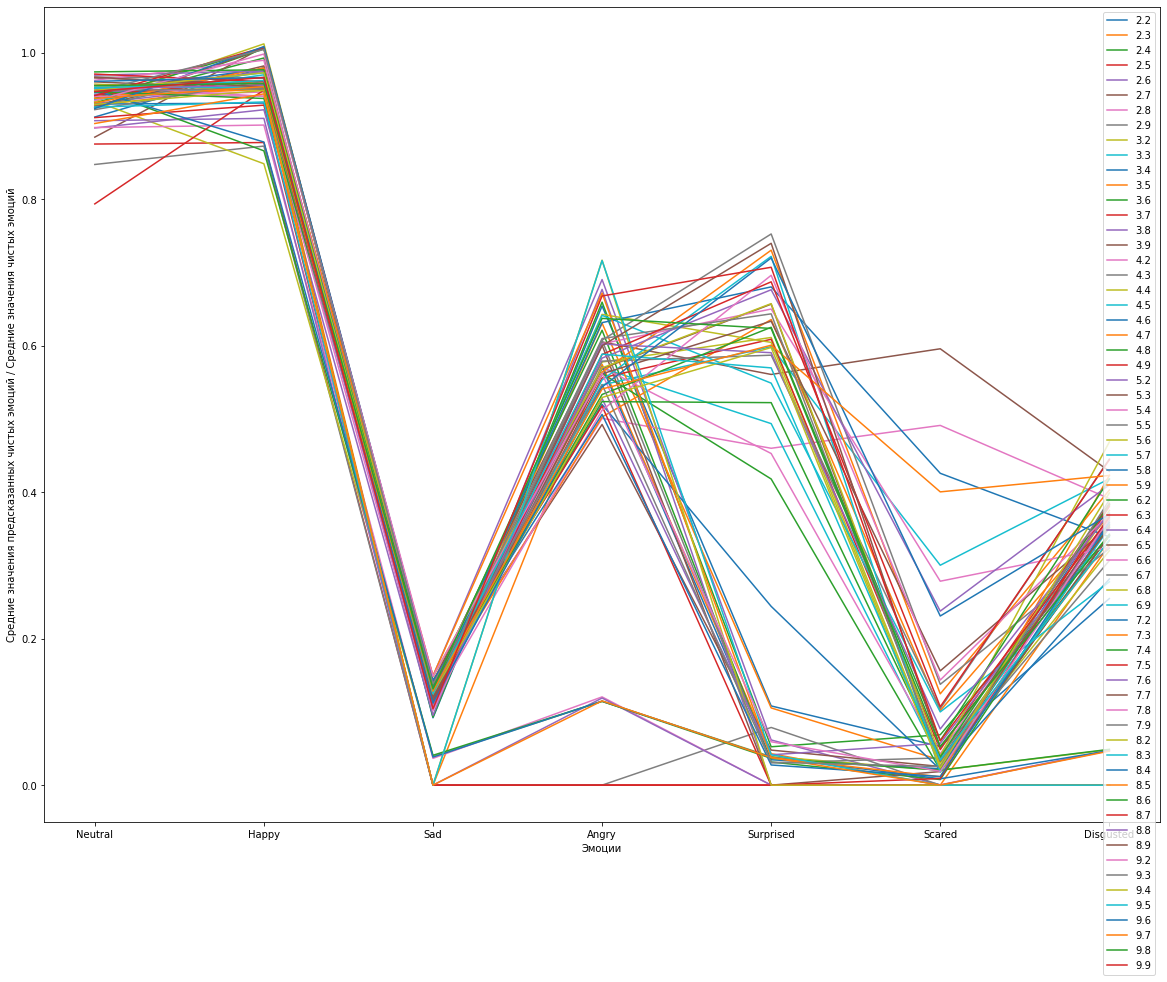

In [36]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics,
    'scale': True
}
df_clear_metrics = tools.plot_emotions(**kwargs)

In [40]:
# df_clear_metrics = df_clear_metrics.drop(['mean', 'norm', 'stat'], 1)
df_clear_metrics

<ipython-input-40-8a45c7058a8d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_clear_metrics = df_clear_metrics.drop(['mean', 'norm', 'stat'], 1)


model   Neutral     Happy           Sad         Angry  Surprised  \
0    2.2  0.912432  0.979848  9.199396e-02  6.543809e-01   0.108162   
1    2.3  0.928004  0.955845  6.735719e-09  5.746749e-01   0.042946   
2    2.4  0.931896  0.993041  9.301494e-02  6.595956e-01   0.052395   
3    2.5  0.875511  0.877591  2.205091e-15  2.517744e-09   0.000003   
4    2.6  0.930760  0.957638  1.490291e-01  6.904732e-01   0.061693   
..   ...       ...       ...           ...           ...        ...   
59   9.5  0.951714  0.962176  1.249307e-01  5.885717e-01   0.569826   
60   9.6  0.961157  0.966416  1.120786e-01  5.437541e-01   0.719949   
61   9.7  0.937833  0.953885  1.283530e-01  5.409734e-01   0.600776   
62   9.8  0.955302  0.958268  1.314145e-01  6.374206e-01   0.623682   
63   9.9  0.947284  0.966458  1.042379e-01  6.680341e-01   0.707238   

          Scared     Disgusted     clear  
0   5.275952e-02  2.548112e-01  0.436341  
1   7.683229e-07  3.280643e-01  0.404219  
2   6.876169e-02  3.409951e-01  0.448529  
3   3.165538e-10  3.372109e-11  0.250444  
4   3.548376e-04  3.910588e-13  0.398564  
..           ...           ...       ...  
59  3.433864e-02  3.345148e-01  0.509439  
60  2.309612e-01  3.700306e-01  0.557764  
61  4.004991e-01  4.229108e-01  0.569319  
62  5.283251e-02  3.425999e-01  0.528788  
63  6.044084e-02  3.652276e-01  0.545560  

[64 rows x 9 columns]

In [41]:
df_clear_metrics.sort_values('clear')

model   Neutral     Happy           Sad         Angry     Surprised  \
33   6.3  0.793779  0.949197  0.000000e+00  0.000000e+00  3.938445e-27   
3    2.5  0.875511  0.877591  2.205091e-15  2.517744e-09  3.182034e-06   
7    2.9  0.847602  0.872741  6.450960e-13  9.402944e-10  7.877406e-02   
13   3.7  0.911595  0.928647  4.308835e-09  1.235918e-07  8.415011e-05   
24   5.2  0.907421  0.910571  3.716454e-06  1.189633e-01  7.403294e-07   
..   ...       ...       ...           ...           ...           ...   
19   4.5  0.945366  0.972900  1.283383e-01  5.465449e-01  5.987795e-01   
44   7.6  0.969583  0.975184  1.100749e-01  5.831884e-01  6.765324e-01   
61   9.7  0.937833  0.953885  1.283530e-01  5.409734e-01  6.007763e-01   
30   5.8  0.947146  0.978224  1.271497e-01  6.316180e-01  6.804090e-01   
15   3.9  0.926918  0.982196  1.411153e-01  6.052298e-01  5.608610e-01   

          Scared     Disgusted     clear  
33  0.000000e+00  0.000000e+00  0.248997  
3   3.165538e-10  3.372109e-11  0.250444  
7   5.519830e-06  4.064374e-11  0.257017  
13  1.180653e-08  2.510004e-09  0.262904  
24  2.613759e-07  4.730163e-02  0.283466  
..           ...           ...       ...  
19  3.003207e-01  4.184493e-01  0.558671  
44  2.376497e-01  4.101544e-01  0.566052  
61  4.004991e-01  4.229108e-01  0.569319  
30  4.258633e-01  3.389821e-01  0.589913  
15  5.959125e-01  4.286264e-01  0.605837  

[64 rows x 9 columns]

In [46]:
metrics += ['clear']

In [47]:
metrics

['mean', 'norm', 'stat', 'clear']

In [48]:
tools.metrics

['mean', 'norm', 'stat']

In [49]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics, df_clear_metrics)
metric_df_dict

{'mean':    model   layer    N      mean      norm      stat
 0    2.2  second  2.2  0.079602  0.219791  0.519760
 1    2.3  second  2.3  0.067630  0.184987  0.477011
 2    2.4  second  2.4  0.064355  0.174966  0.488077
 3    2.5  second  2.5  0.087434  0.262844  0.507587
 4    2.6  second  2.6  0.065946  0.181153  0.484206
 ..   ...     ...  ...       ...       ...       ...
 59   9.5  second  9.5  0.054982  0.151440  0.500078
 60   9.6  second  9.6  0.053667  0.146367  0.495178
 61   9.7  second  9.7  0.057731  0.158434  0.518432
 62   9.8  second  9.8  0.054054  0.149069  0.517090
 63   9.9  second  9.9  0.053672  0.149908  0.520238
 
 [64 rows x 6 columns],
 'norm':    model   layer    N      mean      norm      stat
 0    2.2  second  2.2  0.079602  0.219791  0.519760
 1    2.3  second  2.3  0.067630  0.184987  0.477011
 2    2.4  second  2.4  0.064355  0.174966  0.488077
 3    2.5  second  2.5  0.087434  0.262844  0.507587
 4    2.6  second  2.6  0.065946  0.181153  0.484206
 .. 

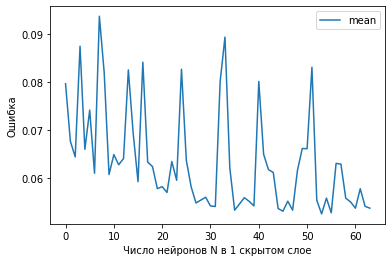

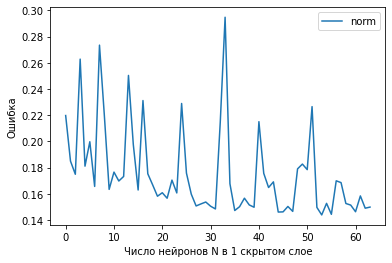

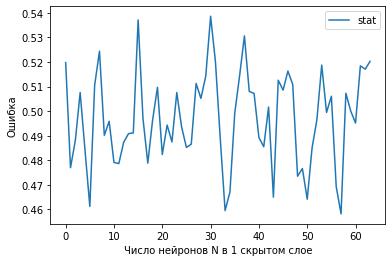

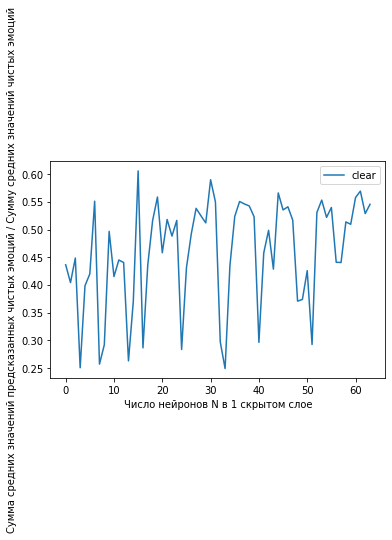

In [50]:
tools.plot_metrics(metric_df_dict, layer='second')

In [51]:
models

[['2.2', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f8222265f10>],
 ['3.7', '3.

In [52]:
path_to_saved_models = '../saved_models/'
layer = 'second'

In [57]:
# def save_models(models, path_to_saved_models, layer='first', v=1):
#     dir_path = os.path.join(path_to_saved_models, layer, f'_{v}')
#     for model_list in models:
#         N = model_list[1]
#         nn = model_list[2]
#         save_name = f'model_{layer}_{N}_{v}'
#         path = os.path.join(dir_path, save_name)
#         nn.model.save(path)

In [58]:
tools.save_models(models, path_to_saved_models, layer)

INFO:tensorflow:Assets written to: ../saved_models/second/_1/model_second_2.2_1/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_1/model_second_2.3_1/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_1/model_second_2.4_1/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_1/model_second_2.5_1/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_1/model_second_2.6_1/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_1/model_second_2.7_1/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_1/model_second_2.8_1/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_1/model_second_2.9_1/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_1/model_second_3.2_1/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_1/model_second_3.3_1/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_1/model_second_3.4_1/assets
INFO:tensorflow:Assets written to: ../saved

In [39]:
# from itertools import chain

# def statistics_v2(self, test, with_mean=False):      
#     diff = self.get_diff(test)
#     assert all([column == self.df_y.columns[i] # ['Neutral', 'Happy', 'Sad', 'Angry',
#         for i, column in enumerate(diff.columns[:7])]) # 'Surprised', 'Scared', 'Disgusted'] 
#     columns = [['min_' + emotion, 'max_' + emotion]
#                for emotion in diff.columns]
#     columns = list(chain.from_iterable(columns))
#     if with_mean: # insert mean
#         for i in range(len(diff.columns)):
#             columns.insert(2 + 3 * i, 'mean_abs_' + self.df_y.columns[i])
#     statistics_df = pd.DataFrame(columns=columns)
#     entry_dict = {}
#     for emotion in diff.columns:
#         entry_dict['min_' + emotion] = np.min(diff[emotion])
#         entry_dict['max_' + emotion] = np.max(diff[emotion])
#         if with_mean: 
#             entry_dict['mean_abs_' + emotion] = np.mean(np.absolute(diff[emotion]))
#     statistics_df = statistics_df.append(entry_dict, ignore_index = True)
#     return statistics_df

# def stat_v2(self, test, type_):
#     if type_ == 'stat':
#         stat = statistics_v2(self, test)
#         vector = np.absolute(stat.values)
#         return vector.mean()
#     elif type_ == 'stat_mean':
#         stat = statistics_v2(self, test, with_mean=True)
#         vector = np.absolute(stat.values)
#         return vector.mean()

In [45]:
# for i in range(8 * 8):
#     df_metrics.at[i, 'stat'] = stat_v2(models[i][2], test, type_='stat')

In [62]:
# models[-7][2].model.save(path)

In [63]:
# models[33][2].model.save(path)

In [64]:
# models[18][2].model.save(path)

In [65]:
# models[54][2].model.save(path)

In [66]:
# models[30][2].model.save(path)

In [67]:
# models[61][2].model.save(path)

In [68]:
# models[46][2].model.save(path)

### Дообучение

In [61]:
test = nn.get_test()
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25321 rows x 9 columns]

In [181]:
len(models)

64

In [69]:
df_metrics_2 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_2

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [70]:
models

[['2.2', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f8222265f10>],
 ['3.7', '3.

In [71]:
v = 2
df_metrics_2 = tools.refitting(models, test, df_metrics_2, v=v)

refit 2.2_2
Epoch 1/20
285/285 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 2/20
285/285 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 3/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 4/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 5/20
285/285 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 6/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 7/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 8/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 9/20
285/285 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 10/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 11/20
285/285 [==============================] - 0s 1ms/step - loss: 0.0195
Epoch 12/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 13/20
2

238/238 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 15/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 16/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 17/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 18/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 19/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 20/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0164
{'model': '2.6_2', 'layer': 'first', 'N': '2.6', 'mean': 0.09449481161881443, 'norm': 0.24556334621759698, 'stat': 0.46788877}
refit 2.7_2
Epoch 1/20
255/255 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 2/20
255/255 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 3/20
255/255 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 4/20
255/255 [==============================] - 0s

238/238 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 7/20
238/238 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 8/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 9/20
238/238 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 10/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 11/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 12/20
238/238 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 13/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 14/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 15/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 16/20
238/238 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 17/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 18/20
238/238 [==========

289/289 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 20/20
289/289 [==============================] - 0s 1ms/step - loss: 0.0299
{'model': '3.7_2', 'layer': 'first', 'N': '3.7', 'mean': 0.11840027616828494, 'norm': 0.38200335577888, 'stat': 0.45161822}
refit 3.8_2
Epoch 1/20
262/262 [==============================] - 1s 2ms/step - loss: 0.0205
Epoch 2/20
262/262 [==============================] - 1s 2ms/step - loss: 0.0201
Epoch 3/20
262/262 [==============================] - 1s 2ms/step - loss: 0.0199
Epoch 4/20
262/262 [==============================] - 1s 2ms/step - loss: 0.0198
Epoch 5/20
262/262 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 6/20
262/262 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 7/20
262/262 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 8/20
262/262 [==============================] - 1s 2ms/step - loss: 0.0174
Epoch 9/20
262/262 [==============================] - 0s 2ms/ste

239/239 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 12/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 13/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 14/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 15/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 16/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 17/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 18/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 19/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 20/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0153
{'model': '4.4_2', 'layer': 'first', 'N': '4.4', 'mean': 0.07670328826087325, 'norm': 0.2077984620883781, 'stat': 0.47141364}
refit 4.5_2
Epoch 1/20
236/236 [==============================] - 

241/241 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 4/20
241/241 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 5/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 6/20
241/241 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 7/20
241/241 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 8/20
241/241 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 9/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 10/20
241/241 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 11/20
241/241 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 12/20
241/241 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 13/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 14/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 15/20
241/241 [=============

239/239 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 17/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 18/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 19/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 20/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0154
{'model': '5.5_2', 'layer': 'first', 'N': '5.5', 'mean': 0.07316049094801322, 'norm': 0.20578024284732807, 'stat': 0.48974785}
refit 5.6_2
Epoch 1/20
233/233 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 2/20
233/233 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 3/20
233/233 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 4/20
233/233 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 5/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 6/20
233/233 [==============================] - 0s 1

289/289 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 9/20
289/289 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 10/20
289/289 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 11/20
289/289 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 12/20
289/289 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 13/20
289/289 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 14/20
289/289 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 15/20
289/289 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 16/20
289/289 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 17/20
289/289 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 18/20
289/289 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 19/20
289/289 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 20/20
289/289 [========

Epoch 1/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 2/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 3/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 4/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 5/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 6/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 7/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 8/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 9/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 10/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 11/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 12/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 13/20
231/231 [====

238/238 [==============================] - 0s 1ms/step - loss: 0.0167
Epoch 15/20
238/238 [==============================] - 0s 1ms/step - loss: 0.0167
Epoch 16/20
238/238 [==============================] - 0s 1ms/step - loss: 0.0167
Epoch 17/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 18/20
238/238 [==============================] - 0s 1ms/step - loss: 0.0167
Epoch 19/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 20/20
238/238 [==============================] - 0s 1ms/step - loss: 0.0166
{'model': '7.3_2', 'layer': 'first', 'N': '7.3', 'mean': 0.0866166094754072, 'norm': 0.2269124580240978, 'stat': 0.460035}
refit 7.4_2
Epoch 1/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 2/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 3/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 4/20
241/241 [==============================] - 0s 2ms

240/240 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 7/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 8/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 9/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 10/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 11/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 12/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 13/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 14/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 15/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 16/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 17/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 18/20
240/240 [==========

239/239 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 20/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0164
{'model': '8.4_2', 'layer': 'first', 'N': '8.4', 'mean': 0.08618256761750552, 'norm': 0.22940582951647703, 'stat': 0.4432671}
refit 8.5_2
Epoch 1/20
296/296 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 2/20
296/296 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 3/20
296/296 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 4/20
296/296 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 5/20
296/296 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 6/20
296/296 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 7/20
296/296 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 8/20
296/296 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 9/20
296/296 [==============================] - 0s 1ms/s

231/231 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 12/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 13/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 14/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 15/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 16/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 17/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 18/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 19/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 20/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0152
{'model': '8.9_2', 'layer': 'first', 'N': '8.9', 'mean': 0.07655849561276072, 'norm': 0.2058466886383205, 'stat': 0.47797087}
refit 9.2_2
Epoch 1/20
235/235 [==============================] - 

230/230 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 4/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 5/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 6/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 7/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 8/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 9/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 10/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 11/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 12/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 13/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 14/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 15/20
230/230 [=============

In [237]:
# def refitting(models, test, df_metrics, df_train=None, v=1, 
#               layer='first', epochs=20, batch_size=20, type_='diff'):
#     for nn_tuple in models:
#         nn = nn_tuple[2]
#         print('refit', nn_tuple[0])
#         if type_ == 'diff':
#             df_train = nn.create_train_df_from_diff(test)
#         elif type_ == 'split' and df_train is not None:
#             pass
#         else:
#             raise Exception('Unknown refitting type.')
#         nn.fit(df_train, epochs=epochs, batch_size=batch_size)
#         entry_dict = {'model': nn_tuple[1] + f'_{v}', 'layer': layer, 'N': nn_tuple[1]}
#         entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
#         df_metrics = df_metrics.append(entry_dict, ignore_index = True)
#         print(entry_dict)
#         return df_metrics

In [72]:
df_metrics_2

model  layer    N      mean      norm      stat
0   2.2_2  first  2.2  0.109211  0.309075  0.474702
1   2.3_2  first  2.3  0.092502  0.246138  0.452962
2   2.4_2  first  2.4  0.084777  0.224502  0.459267
3   2.5_2  first  2.5  0.112793  0.366444  0.462559
4   2.6_2  first  2.6  0.094495  0.245563  0.467889
..    ...    ...  ...       ...       ...       ...
59  9.5_2  first  9.5  0.067859  0.192021  0.481607
60  9.6_2  first  9.6  0.077945  0.213585  0.477428
61  9.7_2  first  9.7  0.076820  0.217767  0.495396
62  9.8_2  first  9.8  0.076117  0.210920  0.499687
63  9.9_2  first  9.9  0.073377  0.205657  0.497745

[64 rows x 6 columns]

In [73]:
df_clear_metrics_2 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_2

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

In [74]:
models

[['2.2_2', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3_2', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4_2', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5_2', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6_2', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7_2', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8_2', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9_2', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2_2', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3_2', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4_2', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5_2', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6_2', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

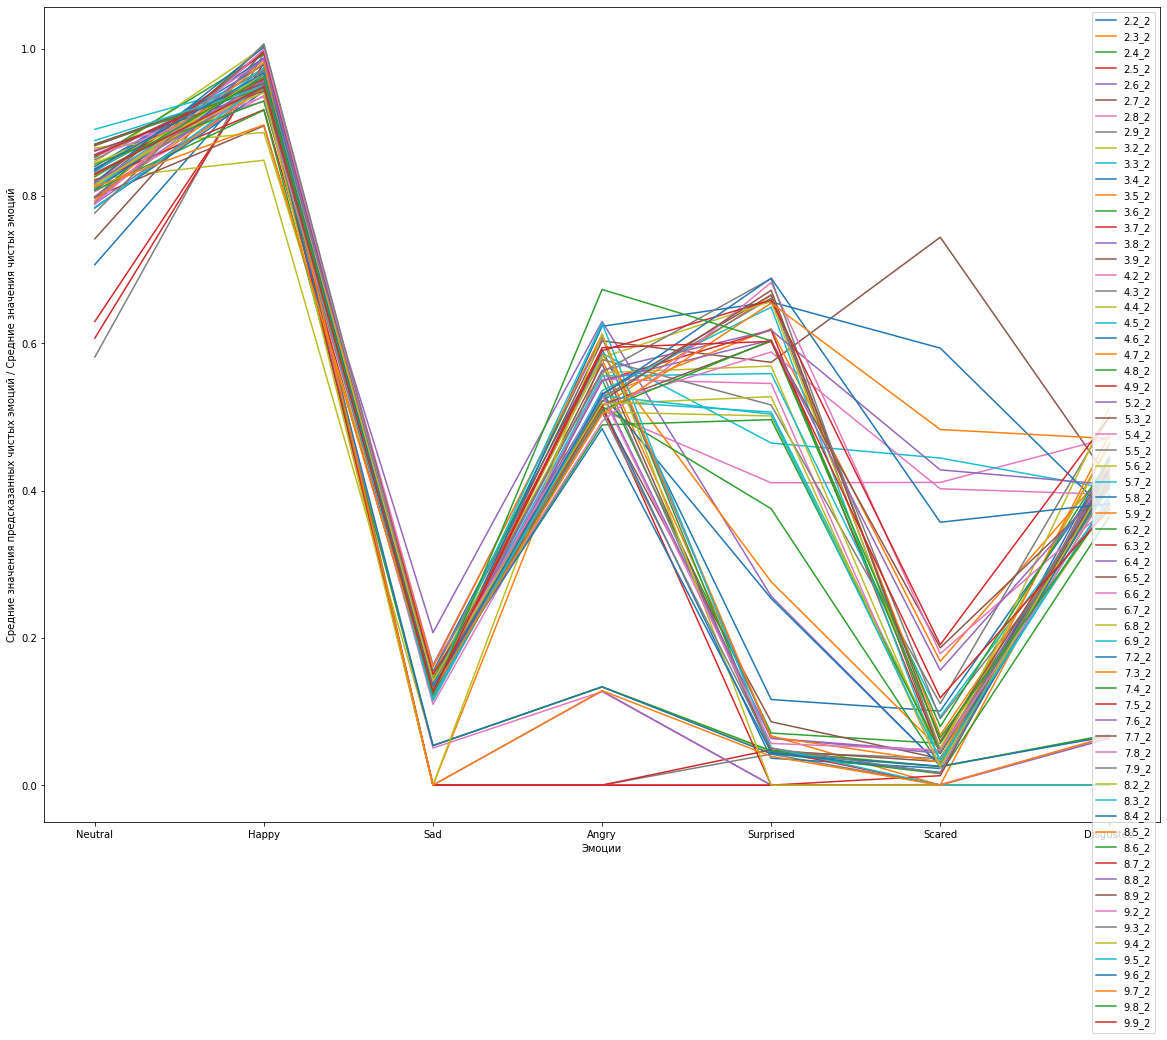

In [75]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_2,
    'scale': True
}
df_clear_metrics_2 = tools.plot_emotions(**kwargs)

In [76]:
df_clear_metrics_2

model   Neutral     Happy           Sad         Angry     Surprised  \
0   2.2_2  0.706793  0.968857  1.544548e-01  5.915963e-01  1.162579e-01   
1   2.3_2  0.799095  0.984447  6.370437e-09  5.783936e-01  6.703456e-02   
2   2.4_2  0.834708  0.957770  1.151651e-01  5.503996e-01  7.075266e-02   
3   2.5_2  0.629542  0.974334  9.165136e-24  6.284440e-15  2.296522e-12   
4   2.6_2  0.815261  0.945790  2.070170e-01  6.295671e-01  2.564935e-01   
..    ...       ...       ...           ...           ...           ...   
59  9.5_2  0.875229  0.948930  1.197789e-01  5.286689e-01  5.038058e-01   
60  9.6_2  0.836633  0.966993  1.282072e-01  5.294949e-01  6.884072e-01   
61  9.7_2  0.812277  0.896557  1.283967e-01  5.035323e-01  6.545228e-01   
62  9.8_2  0.826043  0.961825  1.227156e-01  6.729868e-01  6.035038e-01   
63  9.9_2  0.829381  0.948435  1.274295e-01  5.939444e-01  6.025716e-01   

          Scared     Disgusted     clear  
0   1.006029e-01  4.296468e-01  0.438315  
1   4.648866e-08  4.320113e-01  0.408712  
2   5.668826e-02  4.094454e-01  0.427847  
3   1.138155e-19  1.218840e-18  0.229125  
4   2.603111e-02  4.233286e-01  0.471927  
..           ...           ...       ...  
59  3.383221e-02  3.924023e-01  0.486092  
60  3.569956e-01  3.821686e-01  0.555557  
61  4.828822e-01  4.706097e-01  0.564111  
62  6.440085e-02  3.808870e-01  0.518909  
63  1.184539e-01  3.747613e-01  0.513568  

[64 rows x 9 columns]

In [77]:
df_clear_metrics_2.sort_values('clear')

model   Neutral     Happy           Sad         Angry     Surprised  \
3   2.5_2  0.629542  0.974334  9.165136e-24  6.284440e-15  2.296522e-12   
7   2.9_2  0.581157  0.994243  1.262605e-18  2.616992e-15  4.217180e-02   
13  3.7_2  0.606936  0.980713  7.541407e-12  7.906972e-08  4.798722e-02   
33  6.3_2  0.856195  0.955703  0.000000e+00  0.000000e+00  6.721170e-08   
24  5.2_2  0.799127  0.957308  5.543089e-08  1.278336e-01  3.144726e-08   
..    ...       ...       ...           ...           ...           ...   
60  9.6_2  0.836633  0.966993  1.282072e-01  5.294949e-01  6.884072e-01   
61  9.7_2  0.812277  0.896557  1.283967e-01  5.035323e-01  6.545228e-01   
44  7.6_2  0.855740  0.958152  1.283290e-01  5.631789e-01  6.177776e-01   
30  5.8_2  0.808240  0.964756  1.204360e-01  6.230937e-01  6.561465e-01   
15  3.9_2  0.798425  0.895268  1.311151e-01  6.032842e-01  5.740728e-01   

          Scared     Disgusted     clear  
3   1.138155e-19  1.218840e-18  0.229125  
7   2.256710e-12  1.863774e-18  0.231082  
13  2.133804e-11  2.499953e-12  0.233662  
33  0.000000e+00  0.000000e+00  0.258843  
24  1.728449e-10  6.352557e-02  0.278256  
..           ...           ...       ...  
60  3.569956e-01  3.821686e-01  0.555557  
61  4.828822e-01  4.706097e-01  0.564111  
44  4.280953e-01  4.082081e-01  0.565640  
30  5.934233e-01  3.677681e-01  0.590552  
15  7.439838e-01  4.145281e-01  0.594382  

[64 rows x 9 columns]

In [78]:
metrics

['mean', 'norm', 'stat', 'clear']

In [79]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics_2, df_clear_metrics_2)
metric_df_dict

{'mean':     model  layer    N      mean      norm      stat
 0   2.2_2  first  2.2  0.109211  0.309075  0.474702
 1   2.3_2  first  2.3  0.092502  0.246138  0.452962
 2   2.4_2  first  2.4  0.084777  0.224502  0.459267
 3   2.5_2  first  2.5  0.112793  0.366444  0.462559
 4   2.6_2  first  2.6  0.094495  0.245563  0.467889
 ..    ...    ...  ...       ...       ...       ...
 59  9.5_2  first  9.5  0.067859  0.192021  0.481607
 60  9.6_2  first  9.6  0.077945  0.213585  0.477428
 61  9.7_2  first  9.7  0.076820  0.217767  0.495396
 62  9.8_2  first  9.8  0.076117  0.210920  0.499687
 63  9.9_2  first  9.9  0.073377  0.205657  0.497745
 
 [64 rows x 6 columns],
 'norm':     model  layer    N      mean      norm      stat
 0   2.2_2  first  2.2  0.109211  0.309075  0.474702
 1   2.3_2  first  2.3  0.092502  0.246138  0.452962
 2   2.4_2  first  2.4  0.084777  0.224502  0.459267
 3   2.5_2  first  2.5  0.112793  0.366444  0.462559
 4   2.6_2  first  2.6  0.094495  0.245563  0.467889
 .. 

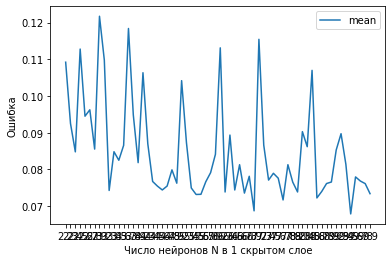

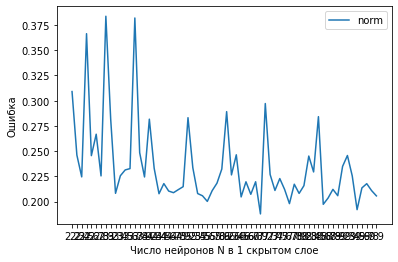

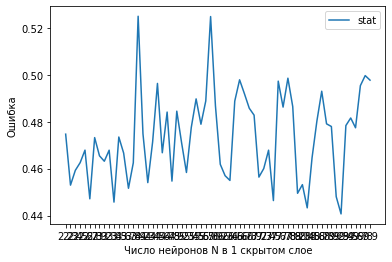

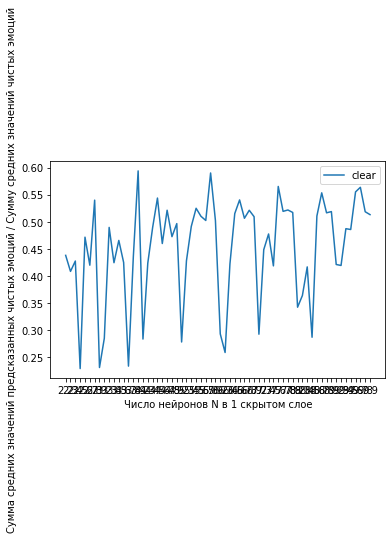

In [80]:
tools.plot_metrics(metric_df_dict)

In [81]:
models

[['2.2_2', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3_2', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4_2', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5_2', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6_2', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7_2', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8_2', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9_2', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2_2', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3_2', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4_2', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5_2', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6_2', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [82]:
v

2

In [84]:
path_to_saved_models = '../saved_models/'
layer = 'second'

In [86]:
tools.save_models(models, path_to_saved_models, layer, v=v)

INFO:tensorflow:Assets written to: ../saved_models/second/_2/model_second_2.2_2/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_2/model_second_2.3_2/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_2/model_second_2.4_2/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_2/model_second_2.5_2/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_2/model_second_2.6_2/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_2/model_second_2.7_2/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_2/model_second_2.8_2/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_2/model_second_2.9_2/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_2/model_second_3.2_2/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_2/model_second_3.3_2/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_2/model_second_3.4_2/assets
INFO:tensorflow:Assets written to: ../saved

In [87]:
full_df_list

[                                  Neutral  Happy   Sad  Angry  Surprised  \
 Index_                                                                     
 00:00:10.100_Боим_6                  0.99   0.00  0.00   0.00       0.01   
 00:01:23.700_Бондаренко Денис_2      0.99   0.00  0.00   0.00       0.01   
 00:01:46.500_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
 00:00:00.848_Керов Андрей_3          0.99   0.00  0.00   0.00       0.01   
 00:00:03.060_Боим_1                  0.99   0.00  0.01   0.01       0.01   
 ...                                   ...    ...   ...    ...        ...   
 00:00:17.500_Смолин Александр_1      0.02   0.96  0.00   0.00       0.00   
 00:00:20.900_Aleksashina_1           0.01   0.98  0.00   0.00       0.00   
 00:00:16.900_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
 00:00:17.000_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
 00:00:15.000_Aleksashina_1           0.01   0.99  0.00   0.00       0.00   

In [88]:
percent_df_list

[                             Neutral  Happy  Sad  Angry  Surprised  Scared  \
 Index_                                                                       
 00:00:00.030_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.060_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.090_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.121_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.151_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 ...                              ...    ...  ...    ...        ...     ...   
 00:00:11.666_Fomin_6            0.05   0.93  0.0    0.0       0.00     0.0   
 00:00:04.060_Керов Андрей_2     0.04   0.94  0.0    0.0       0.00     0.0   
 00:00:11.909_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
 00:00:11.939_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
 00:00:13.100_Aleksashina_1      0.02   0.97  0.0   

In [90]:
df_train_, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                    
00:00:23.700_Смолин Александр_1     0.48   0.05  0.03   0.13       0.00   
00:00:09.666_Fomin_2                0.33   0.50  0.00   0.00       0.00   
00:00:01.909_Боим_1                 0.99   0.00  0.00   0.00       0.01   
00:00:04.000_Бондаренко Денис_2     0.99   0.00  0.00   0.00       0.01   
00:01:16.600_Бондаренко Денис_2     0.98   0.00  0.00   0.01       0.01   
...                                  ...    ...   ...    ...        ...   
00:00:07.700_Nasyrov_7              0.01   0.00  0.00   0.01       0.00   
00:00:08.200_Nasyrov_7              0.01   0.00  0.00   0.01       0.00   
00:00:07.300_Nasyrov_7              0.01   0.00  0.00   0.00       0.00   
00:00:08.900_Nasyrov_7              0.00   0.00  0.00   0.01       0.00   
00:00:09.100_Nasyrov_7              0.00   0.00  0.00   0.01       0.00   

                                 Scared  Disgusted  Valence  Arousal  
Index_                                                                
00:00:23.700_Смолин Александр_1     0.0       0.05    -0.08     0.18  
00:00:09.666_Fomin_2                0.0       0.00     0.50     0.46  
00:00:01.909_Боим_1                 0.0       0.00    -0.00     0.25  
00:00:04.000_Бондаренко Денис_2     0.0       0.00    -0.00     0.25  
00:01:16.600_Бондаренко Денис_2     0.0       0.00    -0.01     0.29  
...                                 ...        ...      ...      ...  
00:00:07.700_Nasyrov_7              0.0       0.99    -0.99     0.63  
00:00:08.200_Nasyrov_7              0.0       0.99    -0.99     0.63  
00:00:07.300_Nasyrov_7              0.0       0.99    -0.99     0.62  
00:00:08.900_Nasyrov_7              0.0       1.00    -1.00     0.63  
00:00:09.100_Nasyrov_7              0.0       1.00    -1.00     0.63  

[18315 rows x 9 columns]

In [91]:
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25321 rows x 9 columns]

In [92]:
models

[['2.2_2', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3_2', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4_2', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5_2', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6_2', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7_2', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8_2', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9_2', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2_2', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3_2', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4_2', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5_2', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6_2', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [93]:
df_metrics_3 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_3

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [95]:
v = 3
df_metrics_3 = tools.refitting(models, test, df_metrics_3, df_train_, v=v, 
              layer='second', epochs=20, batch_size=20, type_='split')

refit 2.2_3
Epoch 1/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0123
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0116
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0114
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0114
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0113
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0112
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0112
Epoch 13/20
9

916/916 [==============================] - 2s 2ms/step - loss: 0.0065
Epoch 15/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0065
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0065
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0065
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0065
{'model': '2.6_3', 'layer': 'second', 'N': '2.6', 'mean': 0.06230324618505532, 'norm': 0.1695777054453553, 'stat': 0.53991807}
refit 2.7_3
Epoch 1/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0096
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0090
Epoch 4/20
916/916 [==============================] - 1s

916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 18/20
916/916 [==========

916/916 [==============================] - 1s 2ms/step - loss: 0.0163
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0163
{'model': '3.7_3', 'layer': 'second', 'N': '3.7', 'mean': 0.08667887912947751, 'norm': 0.24748244433284983, 'stat': 0.48721236}
refit 3.8_3
Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0093
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0089
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0088
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0088
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0087
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0087
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 9/20
916/916 [==============================] - 1s 2ms

916/916 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
{'model': '4.4_3', 'layer': 'second', 'N': '4.4', 'mean': 0.05998170433596901, 'norm': 0.16385424820090577, 'stat': 0.51966196}
refit 4.5_3
Epoch 1/20
916/916 [==============================] 

916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 15/20
916/916 [=============

916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
{'model': '5.5_3', 'layer': 'second', 'N': '5.5', 'mean': 0.05204286338414755, 'norm': 0.14376317937231478, 'stat': 0.53651804}
refit 5.6_3
Epoch 1/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 6/20
916/916 [==============================] - 1s 

916/916 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 20/20
916/916 [========

Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 13/20
916/916 [====

916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0062
{'model': '7.3_3', 'layer': 'second', 'N': '7.3', 'mean': 0.05770277934887474, 'norm': 0.1554805496418095, 'stat': 0.50617963}
refit 7.4_3
Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 4/20
916/916 [==============================] - 1s

916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 18/20
916/916 [==========

916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
{'model': '8.4_3', 'layer': 'second', 'N': '8.4', 'mean': 0.06331678921222926, 'norm': 0.17195456345661947, 'stat': 0.46833715}
refit 8.5_3
Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0126
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0125
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0125
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0124
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0124
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0124
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0124
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0124
Epoch 9/20
916/916 [==============================] - 1s 1ms

916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
{'model': '8.9_3', 'layer': 'second', 'N': '8.9', 'mean': 0.05271813816841752, 'norm': 0.14406391723202994, 'stat': 0.5053181}
refit 9.2_3
Epoch 1/20
916/916 [==============================] -

916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 12/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0054
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 15/20
916/916 [=============

In [96]:
# v = 3
# for nn_tuple in models:
#     nn = nn_tuple[2]
#     print('refit', nn_tuple[0])
#     nn.fit(df_train, epochs=5, batch_size=20)
#     entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
#     entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
#     df_metrics = df_metrics.append(entry_dict, ignore_index = True)
#     print(entry_dict)

In [104]:
# df_metrics_3 = df_metrics_3[64:]
df_metrics_3

model   layer    N      mean      norm      stat
64   2.2_3  second  2.2  0.080276  0.218700  0.506784
65   2.3_3  second  2.3  0.066868  0.182144  0.480074
66   2.4_3  second  2.4  0.061406  0.166451  0.476887
67   2.5_3  second  2.5  0.085364  0.251533  0.500324
68   2.6_3  second  2.6  0.062303  0.169578  0.539918
..     ...     ...  ...       ...       ...       ...
123  9.5_3  second  9.5  0.053523  0.147874  0.516639
124  9.6_3  second  9.6  0.051713  0.142617  0.513967
125  9.7_3  second  9.7  0.055785  0.156031  0.547727
126  9.8_3  second  9.8  0.051909  0.144393  0.553666
127  9.9_3  second  9.9  0.051880  0.143980  0.542926

[64 rows x 6 columns]

In [105]:
df_clear_metrics_3 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_3

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

In [106]:
models

[['2.2_3', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3_3', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4_3', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5_3', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6_3', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7_3', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8_3', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9_3', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2_3', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3_3', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4_3', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5_3', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6_3', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

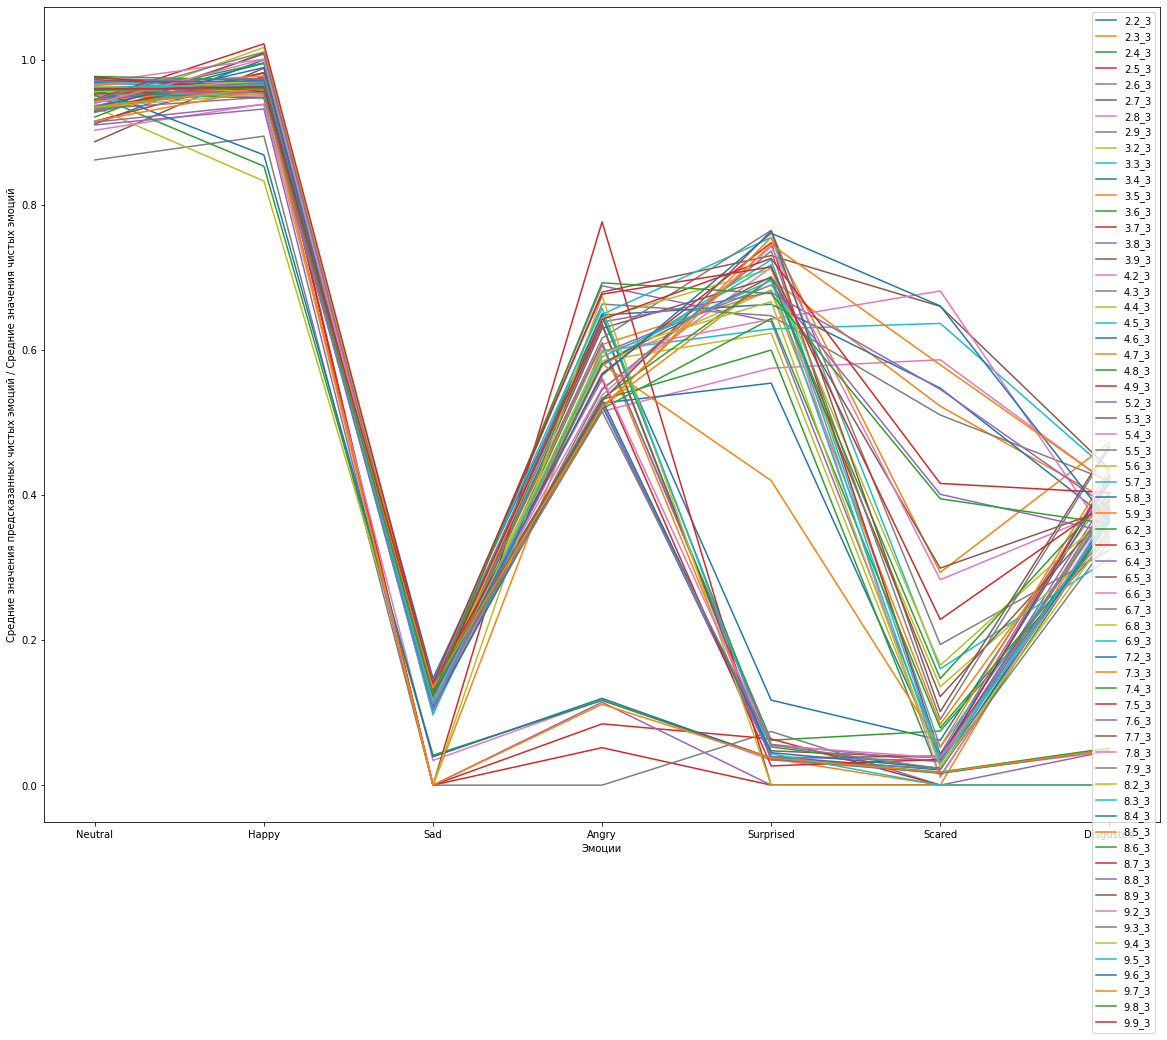

In [107]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_3,
    'scale': True
}
df_clear_metrics_3 = tools.plot_emotions(**kwargs)

In [108]:
df_clear_metrics_3

model   Neutral     Happy           Sad     Angry     Surprised  \
0   2.2_3  0.911102  0.999804  1.470983e-01  0.645239  1.171304e-01   
1   2.3_3  0.931721  0.981498  6.553812e-10  0.606205  3.664173e-02   
2   2.4_3  0.949809  0.957608  1.086554e-01  0.608900  6.190834e-02   
3   2.5_3  0.914939  0.976490  2.874756e-16  0.051606  1.464781e-09   
4   2.6_3  0.931887  0.948182  1.315304e-01  0.688183  6.387061e-01   
..    ...       ...       ...           ...       ...           ...   
59  9.5_3  0.961571  0.965072  1.125772e-01  0.590433  6.954321e-01   
60  9.6_3  0.968857  0.970653  1.225790e-01  0.564805  7.606825e-01   
61  9.7_3  0.935005  0.960596  1.340790e-01  0.521033  7.452597e-01   
62  9.8_3  0.957864  0.960016  1.246473e-01  0.692328  6.774503e-01   
63  9.9_3  0.959184  0.961804  1.407891e-01  0.676626  7.142345e-01   

          Scared     Disgusted     clear  
0   6.191474e-02  4.197287e-01  0.471717  
1   4.455040e-07  3.905085e-01  0.420939  
2   7.458245e-02  3.423049e-01  0.443395  
3   1.023843e-13  2.645317e-13  0.277577  
4   4.303380e-02  4.273196e-01  0.544120  
..           ...           ...       ...  
59  3.051735e-02  3.682827e-01  0.531984  
60  6.604604e-01  3.627641e-01  0.630115  
61  5.793400e-01  4.155649e-01  0.612983  
62  3.946602e-01  3.602054e-01  0.595310  
63  2.283072e-01  3.913687e-01  0.581759  

[64 rows x 9 columns]

In [109]:
df_clear_metrics_3.sort_values('clear')

model   Neutral     Happy           Sad         Angry     Surprised  \
7   2.9_3  0.861638  0.894461  1.919527e-16  2.344012e-11  7.385946e-02   
3   2.5_3  0.914939  0.976490  2.874756e-16  5.160612e-02  1.464781e-09   
24  5.2_3  0.909848  0.931902  9.827864e-09  1.142150e-01  3.578009e-07   
8   3.2_3  0.934119  0.832516  4.054799e-02  1.174138e-01  3.786209e-02   
13  3.7_3  0.930493  0.981953  1.149361e-10  8.443345e-02  6.366352e-02   
..    ...       ...       ...           ...           ...           ...   
36  6.6_3  0.965929  0.969977  9.908571e-02  5.963769e-01  6.420475e-01   
19  4.5_3  0.940727  0.972909  1.040372e-01  5.986925e-01  6.287511e-01   
44  7.6_3  0.970338  0.974017  1.380183e-01  6.383028e-01  6.790255e-01   
60  9.6_3  0.968857  0.970653  1.225790e-01  5.648053e-01  7.606825e-01   
15  3.9_3  0.927938  0.981666  1.298721e-01  6.795367e-01  7.298421e-01   

          Scared     Disgusted     clear  
7   3.332690e-07  2.997894e-14  0.261423  
3   1.023843e-13  2.645317e-13  0.277577  
24  2.164949e-10  4.715958e-02  0.286161  
8   1.800680e-02  5.032310e-02  0.290113  
13  1.106259e-09  5.577850e-11  0.294363  
..           ...           ...       ...  
36  6.810350e-01  3.389601e-01  0.613344  
19  6.363547e-01  4.320334e-01  0.616215  
44  5.454710e-01  3.820551e-01  0.618175  
60  6.604604e-01  3.627641e-01  0.630115  
15  6.598943e-01  4.356084e-01  0.649194  

[64 rows x 9 columns]

In [110]:
metrics

['mean', 'norm', 'stat', 'clear']

In [111]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics_3, df_clear_metrics_3)
metric_df_dict

{'mean':      model   layer    N      mean      norm      stat
 64   2.2_3  second  2.2  0.080276  0.218700  0.506784
 65   2.3_3  second  2.3  0.066868  0.182144  0.480074
 66   2.4_3  second  2.4  0.061406  0.166451  0.476887
 67   2.5_3  second  2.5  0.085364  0.251533  0.500324
 68   2.6_3  second  2.6  0.062303  0.169578  0.539918
 ..     ...     ...  ...       ...       ...       ...
 123  9.5_3  second  9.5  0.053523  0.147874  0.516639
 124  9.6_3  second  9.6  0.051713  0.142617  0.513967
 125  9.7_3  second  9.7  0.055785  0.156031  0.547727
 126  9.8_3  second  9.8  0.051909  0.144393  0.553666
 127  9.9_3  second  9.9  0.051880  0.143980  0.542926
 
 [64 rows x 6 columns],
 'norm':      model   layer    N      mean      norm      stat
 64   2.2_3  second  2.2  0.080276  0.218700  0.506784
 65   2.3_3  second  2.3  0.066868  0.182144  0.480074
 66   2.4_3  second  2.4  0.061406  0.166451  0.476887
 67   2.5_3  second  2.5  0.085364  0.251533  0.500324
 68   2.6_3  second  2.

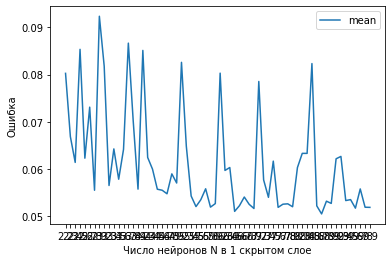

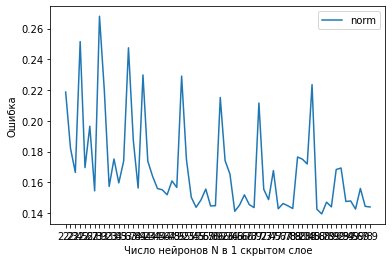

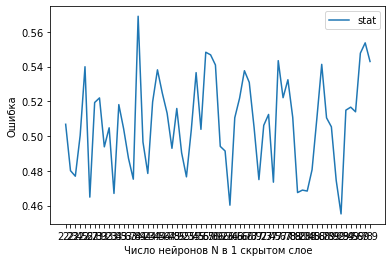

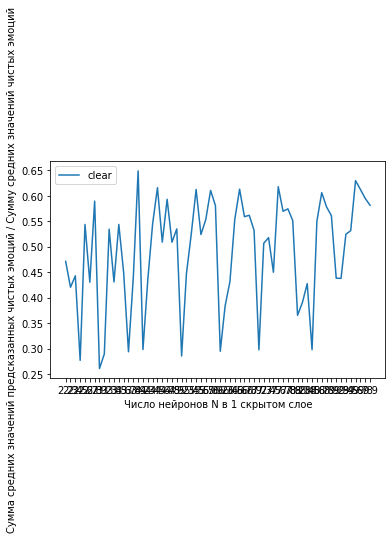

In [112]:
tools.plot_metrics(metric_df_dict)

In [113]:
models

[['2.2_3', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3_3', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4_3', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5_3', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6_3', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7_3', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8_3', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9_3', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2_3', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3_3', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4_3', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5_3', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6_3', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [114]:
v

3

In [115]:
path_to_saved_models = '../saved_models/'
layer = 'second'

In [117]:
save_models(models, path_to_saved_models, layer, v=v)

INFO:tensorflow:Assets written to: ../saved_models/second/_3/model_second_2.2_3/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_3/model_second_2.3_3/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_3/model_second_2.4_3/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_3/model_second_2.5_3/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_3/model_second_2.6_3/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_3/model_second_2.7_3/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_3/model_second_2.8_3/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_3/model_second_2.9_3/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_3/model_second_3.2_3/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_3/model_second_3.3_3/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_3/model_second_3.4_3/assets
INFO:tensorflow:Assets written to: ../saved

In [118]:
models

[['2.2_3', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3_3', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4_3', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5_3', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6_3', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7_3', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8_3', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9_3', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2_3', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3_3', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4_3', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5_3', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6_3', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [120]:
df_metrics_4 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_4

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [121]:
v = 4
df_metrics_4 = tools.refitting(models, test, df_metrics_4, v=v)

refit 2.2_4
Epoch 1/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 2/20
285/285 [==============================] - 0s 1ms/step - loss: 0.0195
Epoch 3/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 4/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 5/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 6/20
285/285 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 7/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 8/20
285/285 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 9/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 10/20
285/285 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 11/20
285/285 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 12/20
285/285 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 13/20
2

243/243 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 15/20
243/243 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 16/20
243/243 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 17/20
243/243 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 18/20
243/243 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 19/20
243/243 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 20/20
243/243 [==============================] - 0s 2ms/step - loss: 0.0152
{'model': '2.6_4', 'layer': 'first', 'N': '2.6', 'mean': 0.08368347846684288, 'norm': 0.22116840232729648, 'stat': 0.49921483}
refit 2.7_4
Epoch 1/20
259/259 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 2/20
259/259 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 3/20
259/259 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 4/20
259/259 [==============================] - 0s

236/236 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 7/20
236/236 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 8/20
236/236 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 9/20
236/236 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 10/20
236/236 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 11/20
236/236 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 12/20
236/236 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 13/20
236/236 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 14/20
236/236 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 15/20
236/236 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 16/20
236/236 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 17/20
236/236 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 18/20
236/236 [==========

287/287 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 20/20
287/287 [==============================] - 0s 1ms/step - loss: 0.0270
{'model': '3.7_4', 'layer': 'first', 'N': '3.7', 'mean': 0.133602699816499, 'norm': 0.3970266189397495, 'stat': 0.4606567}
refit 3.8_4
Epoch 1/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0182
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0178
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 7/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 8/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0176
Epoch 9/20
250/250 [==============================] - 0s 2ms/step

234/234 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 12/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 13/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 14/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 15/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 16/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 17/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 18/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 19/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 20/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0152
{'model': '4.4_4', 'layer': 'first', 'N': '4.4', 'mean': 0.07768532731689394, 'norm': 0.2078481281456772, 'stat': 0.49782464}
refit 4.5_4
Epoch 1/20
233/233 [==============================] - 

239/239 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 4/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 5/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 6/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 7/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 8/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 9/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 10/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 11/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 12/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 13/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 14/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 15/20
239/239 [=============

235/235 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 17/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 18/20
235/235 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 19/20
235/235 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 20/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0151
{'model': '5.5_4', 'layer': 'first', 'N': '5.5', 'mean': 0.06975061857534966, 'norm': 0.193740901830841, 'stat': 0.5084364}
refit 5.6_4
Epoch 1/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 2/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 3/20
233/233 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 4/20
233/233 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 5/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 6/20
233/233 [==============================] - 0s 2ms/

290/290 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 9/20
290/290 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 10/20
290/290 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 11/20
290/290 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 12/20
290/290 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 13/20
290/290 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 14/20
290/290 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 15/20
290/290 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 16/20
290/290 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 17/20
290/290 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 18/20
290/290 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 19/20
290/290 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 20/20
290/290 [========

Epoch 1/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 2/20
228/228 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 3/20
228/228 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 4/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 5/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 6/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 7/20
228/228 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 8/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 9/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 10/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 11/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 12/20
228/228 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 13/20
228/228 [====

238/238 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 15/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 16/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 17/20
238/238 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 18/20
238/238 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 19/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 20/20
238/238 [==============================] - 0s 1ms/step - loss: 0.0153
{'model': '7.3_4', 'layer': 'first', 'N': '7.3', 'mean': 0.0724981857943999, 'norm': 0.197997681555564, 'stat': 0.4832357}
refit 7.4_4
Epoch 1/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 2/20
232/232 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 3/20
232/232 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 4/20
232/232 [==============================] - 0s 1ms

237/237 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 11/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 12/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 13/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 14/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 15/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 16/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 17/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 18/20
237/237 [==========

235/235 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 20/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0165
{'model': '8.4_4', 'layer': 'first', 'N': '8.4', 'mean': 0.08660818527605545, 'norm': 0.2302992634365919, 'stat': 0.45339915}
refit 8.5_4
Epoch 1/20
293/293 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 2/20
293/293 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 3/20
293/293 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 4/20
293/293 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 5/20
293/293 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 6/20
293/293 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 7/20
293/293 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 8/20
293/293 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 9/20
293/293 [==============================] - 0s 2ms/s

234/234 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 12/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 13/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 14/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 15/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 16/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 17/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 18/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 19/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 20/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0148
{'model': '8.9_4', 'layer': 'first', 'N': '8.9', 'mean': 0.07715405730597696, 'norm': 0.21171611969347706, 'stat': 0.48620197}
refit 9.2_4
Epoch 1/20
234/234 [==============================] -

231/231 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 4/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 5/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 6/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 7/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 8/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 9/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 10/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 11/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 12/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 13/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 14/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 15/20
231/231 [=============

In [380]:
# v = 4
# for nn_tuple in models:
#     nn = nn_tuple[2]
#     print('refit', nn_tuple[0])
#     df_train = nn.create_train_df_from_diff(test)
#     nn.fit(df_train, epochs=5, batch_size=20)
#     entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
#     entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
#     df_metrics = df_metrics.append(entry_dict, ignore_index = True)
#     print(entry_dict)

refit 0
Epoch 1/5
295/295 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 2/5
295/295 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 3/5
295/295 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 4/5
295/295 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 5/5
295/295 [==============================] - 0s 1ms/step - loss: 0.0220
{'model': '0_4', 'layer': 'first', 'N': 0, 'mean': 0.12436357350194925, 'norm': 0.3200826691446303, 'stat': 0.3429236}
refit 2
Epoch 1/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 2/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 3/5
296/296 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 4/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 5/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0220
{'model': '2_4', 'layer': 'first', 'N': 2, 'mean': 0.121168107746

In [122]:
df_metrics_4

model  layer    N      mean      norm      stat
0   2.2_4  first  2.2  0.107045  0.300008  0.467366
1   2.3_4  first  2.3  0.087175  0.230128  0.454198
2   2.4_4  first  2.4  0.091002  0.246020  0.460542
3   2.5_4  first  2.5  0.130244  0.391094  0.461988
4   2.6_4  first  2.6  0.083683  0.221168  0.499215
..    ...    ...  ...       ...       ...       ...
59  9.5_4  first  9.5  0.068835  0.192450  0.495256
60  9.6_4  first  9.6  0.075776  0.208541  0.495170
61  9.7_4  first  9.7  0.072747  0.204692  0.508613
62  9.8_4  first  9.8  0.070829  0.197742  0.518034
63  9.9_4  first  9.9  0.079833  0.217725  0.540178

[64 rows x 6 columns]

In [123]:
df_clear_metrics_4 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_4

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

In [124]:
models

[['2.2_4', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3_4', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4_4', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5_4', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6_4', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7_4', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8_4', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9_4', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2_4', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3_4', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4_4', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5_4', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6_4', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

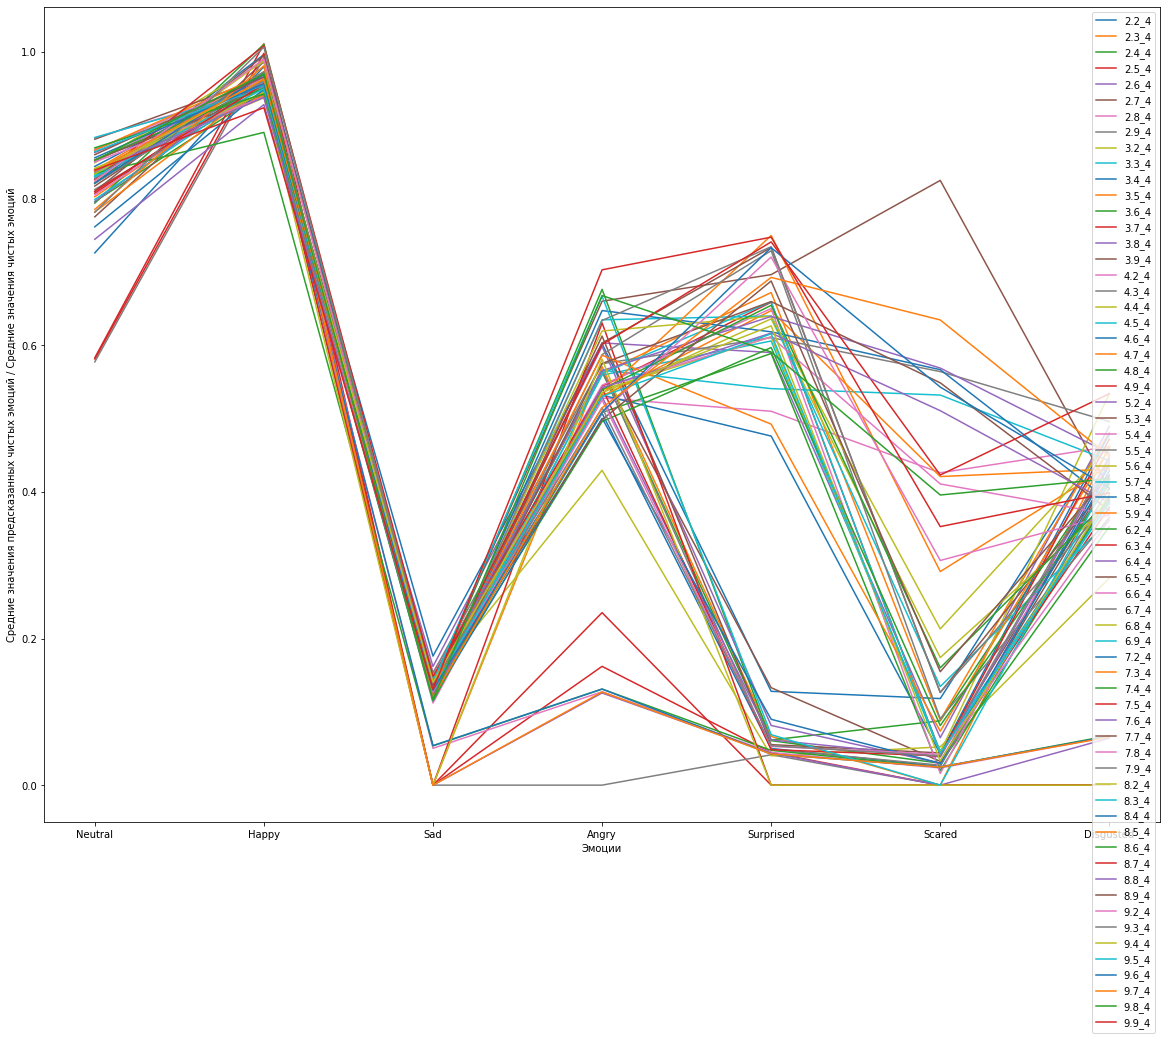

In [125]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_4,
    'scale': True
}
df_clear_metrics_4 = tools.plot_emotions(**kwargs)

In [127]:
df_clear_metrics_4.sort_values('clear')

model   Neutral     Happy           Sad         Angry     Surprised  \
7   2.9_4  0.577323  0.992235  1.685308e-22  6.664828e-17  4.142939e-02   
13  3.7_4  0.581291  0.998191  1.368300e-13  1.620097e-01  4.449030e-02   
3   2.5_4  0.582950  1.011131  6.687207e-26  2.352783e-01  5.868241e-15   
24  5.2_4  0.796279  0.961248  1.736034e-09  1.257056e-01  4.352938e-02   
51  8.5_4  0.785358  0.981207  2.153103e-08  1.270949e-01  4.248842e-02   
..    ...       ...       ...           ...           ...           ...   
44  7.6_4  0.862838  0.956011  1.392281e-01  5.653566e-01  6.392724e-01   
53  8.7_4  0.810063  0.956286  1.358430e-01  6.010438e-01  7.409941e-01   
61  9.7_4  0.837418  0.963096  1.197793e-01  5.146987e-01  6.925815e-01   
27  5.5_4  0.867150  0.955610  1.525980e-01  5.748381e-01  6.104605e-01   
15  3.9_4  0.817174  0.970017  1.400633e-01  6.600607e-01  6.963797e-01   

          Scared     Disgusted     clear  
7   3.261916e-13  2.978144e-22  0.230141  
13  1.805358e-13  1.357803e-14  0.255140  
3   1.139292e-23  3.450949e-21  0.261337  
24  1.502347e-12  6.414754e-02  0.284416  
51  2.468441e-02  6.550379e-02  0.289477  
..           ...           ...       ...  
44  5.689283e-01  4.524731e-01  0.597730  
53  4.230330e-01  5.339039e-01  0.600167  
61  6.345368e-01  4.488684e-01  0.601568  
27  5.640818e-01  4.959398e-01  0.602954  
15  8.248816e-01  4.038525e-01  0.644633  

[64 rows x 9 columns]

In [128]:
metrics

['mean', 'norm', 'stat', 'clear']

In [129]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics_4, df_clear_metrics_4)
metric_df_dict

{'mean':     model  layer    N      mean      norm      stat
 0   2.2_4  first  2.2  0.107045  0.300008  0.467366
 1   2.3_4  first  2.3  0.087175  0.230128  0.454198
 2   2.4_4  first  2.4  0.091002  0.246020  0.460542
 3   2.5_4  first  2.5  0.130244  0.391094  0.461988
 4   2.6_4  first  2.6  0.083683  0.221168  0.499215
 ..    ...    ...  ...       ...       ...       ...
 59  9.5_4  first  9.5  0.068835  0.192450  0.495256
 60  9.6_4  first  9.6  0.075776  0.208541  0.495170
 61  9.7_4  first  9.7  0.072747  0.204692  0.508613
 62  9.8_4  first  9.8  0.070829  0.197742  0.518034
 63  9.9_4  first  9.9  0.079833  0.217725  0.540178
 
 [64 rows x 6 columns],
 'norm':     model  layer    N      mean      norm      stat
 0   2.2_4  first  2.2  0.107045  0.300008  0.467366
 1   2.3_4  first  2.3  0.087175  0.230128  0.454198
 2   2.4_4  first  2.4  0.091002  0.246020  0.460542
 3   2.5_4  first  2.5  0.130244  0.391094  0.461988
 4   2.6_4  first  2.6  0.083683  0.221168  0.499215
 .. 

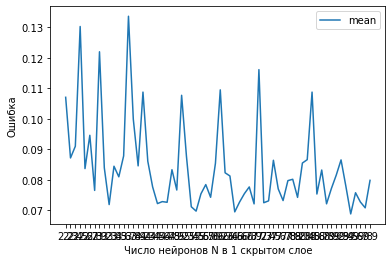

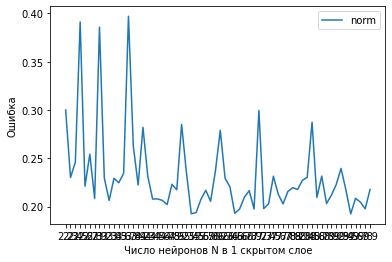

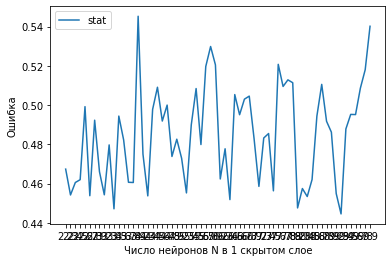

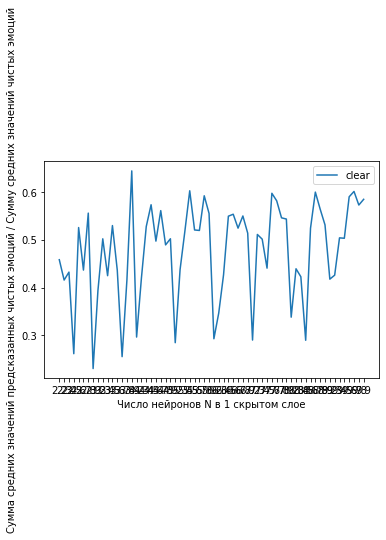

In [130]:
tools.plot_metrics(metric_df_dict)

In [131]:
models

[['2.2_4', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3_4', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4_4', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5_4', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6_4', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7_4', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8_4', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9_4', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2_4', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3_4', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4_4', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5_4', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6_4', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [132]:
v

4

In [133]:
path_to_saved_models = '../saved_models/'
layer = 'second'

In [135]:
save_models(models, path_to_saved_models, layer, v=v)

INFO:tensorflow:Assets written to: ../saved_models/second/_4/model_second_2.2_4/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_4/model_second_2.3_4/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_4/model_second_2.4_4/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_4/model_second_2.5_4/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_4/model_second_2.6_4/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_4/model_second_2.7_4/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_4/model_second_2.8_4/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_4/model_second_2.9_4/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_4/model_second_3.2_4/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_4/model_second_3.3_4/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_4/model_second_3.4_4/assets
INFO:tensorflow:Assets written to: ../saved

In [136]:
models

[['2.2_4', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3_4', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4_4', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5_4', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6_4', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7_4', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8_4', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9_4', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2_4', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3_4', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4_4', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5_4', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6_4', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [137]:
df_train_, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train_

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:08.484_Fomin_5                 0.81   0.05  0.01   0.01       0.01   
00:00:07.454_Керов Андрей_9          0.60   0.19  0.00   0.01       0.00   
00:00:00.818_Korsakov_6              0.97   0.00  0.00   0.01       0.01   
00:00:00.060_Керов Андрей_4          0.98   0.02  0.00   0.00       0.01   
00:01:33.900_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
...                                   ...    ...   ...    ...        ...   
00:00:07.700_Nasyrov_7               0.01   0.00  0.00   0.01       0.00   
00:00:08.200_Nasyrov_7               0.01   0.00  0.00   0.01       0.00   
00:00:07.300_Nasyrov_7               0.01   0.00  0.00   0.00       0.00   
00:00:08.900_Nasyrov_7               0.00   0.00  0.00   0.01       0.00   
00:00:09.100_Nasyrov_7               0.00   0.00  0.00   0.01       0.00   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:00:08.484_Fomin_5                 0.0       0.00     0.04     0.28  
00:00:07.454_Керов Андрей_9          0.0       0.00     0.17     0.40  
00:00:00.818_Korsakov_6              0.0       0.01    -0.01     0.30  
00:00:00.060_Керов Андрей_4          0.0       0.00     0.01     0.25  
00:01:33.900_Балакин Владислав_1     0.0       0.00    -0.00     0.26  
...                                  ...        ...      ...      ...  
00:00:07.700_Nasyrov_7               0.0       0.99    -0.99     0.63  
00:00:08.200_Nasyrov_7               0.0       0.99    -0.99     0.63  
00:00:07.300_Nasyrov_7               0.0       0.99    -0.99     0.62  
00:00:08.900_Nasyrov_7               0.0       1.00    -1.00     0.63  
00:00:09.100_Nasyrov_7               0.0       1.00    -1.00     0.63  

[18315 rows x 9 columns]

In [139]:
df_metrics_5 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_5

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [140]:
v = 5
df_metrics_5 = tools.refitting(models, test, df_metrics_5, df_train_, v=v, 
              layer='second', epochs=20, batch_size=20, type_='split')

refit 2.2_5
Epoch 1/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0112
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0110
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0110
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0110
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0110
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0110
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0110
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0110
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0110
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0110
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0110
Epoch 13/20
9

916/916 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0064
{'model': '2.6_5', 'layer': 'second', 'N': '2.6', 'mean': 0.062360177023447504, 'norm': 0.16906329072458842, 'stat': 0.5488769}
refit 2.7_5
Epoch 1/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0089
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0089
Epoch 4/20
916/916 [==============================] - 1

916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 18/20
916/916 [==========

916/916 [==============================] - 1s 1ms/step - loss: 0.0162
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0162
{'model': '3.7_5', 'layer': 'second', 'N': '3.7', 'mean': 0.0881773067298036, 'norm': 0.25257004233894653, 'stat': 0.48800614}
refit 3.8_5
Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0090
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0086
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0085
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0085
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0085
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0084
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0085
Epoch 9/20
916/916 [==============================] - 1s 1ms/

916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
{'model': '4.4_5', 'layer': 'second', 'N': '4.4', 'mean': 0.059041924017049656, 'norm': 0.16224995451157992, 'stat': 0.52981967}
refit 4.5_5
Epoch 1/20
916/916 [==============================]

916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 15/20
916/916 [=============

916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
{'model': '5.5_5', 'layer': 'second', 'N': '5.5', 'mean': 0.05175380150122428, 'norm': 0.14318210732137807, 'stat': 0.53971606}
refit 5.6_5
Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 6/20
916/916 [==============================] - 1s 

916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 20/20
916/916 [========

Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 13/20
916/916 [====

916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
{'model': '7.3_5', 'layer': 'second', 'N': '7.3', 'mean': 0.05358089408777018, 'norm': 0.14797784785721063, 'stat': 0.5158682}
refit 7.4_5
Epoch 1/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 4/20
916/916 [==============================] - 1s

916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 18/20
916/916 [==========

916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0070
{'model': '8.4_5', 'layer': 'second', 'N': '8.4', 'mean': 0.06385318867350365, 'norm': 0.17186996321059295, 'stat': 0.47784147}
refit 8.5_5
Epoch 1/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0126
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0124
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0124
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0124
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0124
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0123
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0123
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0123
Epoch 9/20
916/916 [==============================] - 1s 1ms

916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0054
{'model': '8.9_5', 'layer': 'second', 'N': '8.9', 'mean': 0.05062088167394935, 'norm': 0.1398985564192052, 'stat': 0.5240542}
refit 9.2_5
Epoch 1/20
916/916 [==============================] - 

916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0053
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0053
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0053
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 15/20
916/916 [=============

In [138]:
# v = 5
# for nn_tuple in models:
#     nn = nn_tuple[2]
#     print('refit', nn_tuple[0])
#     nn.fit(df_train, epochs=5, batch_size=20)
#     entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
#     entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
#     df_metrics = df_metrics.append(entry_dict, ignore_index = True)
#     print(entry_dict)

In [141]:
df_metrics_5

model   layer    N      mean      norm      stat
0   2.2_5  second  2.2  0.078289  0.214014  0.507822
1   2.3_5  second  2.3  0.067130  0.182908  0.480687
2   2.4_5  second  2.4  0.062440  0.169979  0.480935
3   2.5_5  second  2.5  0.085538  0.249614  0.485652
4   2.6_5  second  2.6  0.062360  0.169063  0.548877
..    ...     ...  ...       ...       ...       ...
59  9.5_5  second  9.5  0.053527  0.147115  0.526611
60  9.6_5  second  9.6  0.050940  0.140930  0.520589
61  9.7_5  second  9.7  0.054568  0.153311  0.554506
62  9.8_5  second  9.8  0.051190  0.142700  0.563049
63  9.9_5  second  9.9  0.050219  0.139397  0.569504

[64 rows x 6 columns]

In [142]:
df_metrics_5.sort_values('mean')

model   layer    N      mean      norm      stat
35  6.5_5  second  6.5  0.050128  0.138740  0.529377
63  9.9_5  second  9.9  0.050219  0.139397  0.569504
30  5.8_5  second  5.8  0.050612  0.141582  0.559874
55  8.9_5  second  8.9  0.050621  0.139899  0.524054
53  8.7_5  second  8.7  0.050669  0.139499  0.545283
..    ...     ...  ...       ...       ...       ...
24  5.2_5  second  5.2  0.084312  0.230442  0.489063
16  4.2_5  second  4.2  0.084487  0.227757  0.493763
3   2.5_5  second  2.5  0.085538  0.249614  0.485652
13  3.7_5  second  3.7  0.088177  0.252570  0.488006
7   2.9_5  second  2.9  0.093322  0.272102  0.522092

[64 rows x 6 columns]

In [148]:
df_metrics_5.sort_values('stat')

model   layer    N      mean      norm      stat
57  9.3_5  second  9.3  0.061529  0.165974  0.458779
34  6.4_5  second  6.4  0.058523  0.160166  0.459457
48  8.2_5  second  8.2  0.059898  0.175061  0.468538
8   3.2_5  second  3.2  0.066112  0.178806  0.469198
5   2.7_5  second  2.7  0.073029  0.197496  0.470644
..    ...     ...  ...       ...       ...       ...
44  7.6_5  second  7.6  0.051737  0.142874  0.563548
63  9.9_5  second  9.9  0.050219  0.139397  0.569504
38  6.8_5  second  6.8  0.053377  0.147358  0.571060
31  5.9_5  second  5.9  0.052079  0.144164  0.571436
15  3.9_5  second  3.9  0.054850  0.154613  0.581232

[64 rows x 6 columns]

In [143]:
df_clear_metrics_5 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_5

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

In [144]:
models

[['2.2_5', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3_5', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4_5', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5_5', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6_5', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7_5', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8_5', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9_5', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2_5', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3_5', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4_5', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5_5', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6_5', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

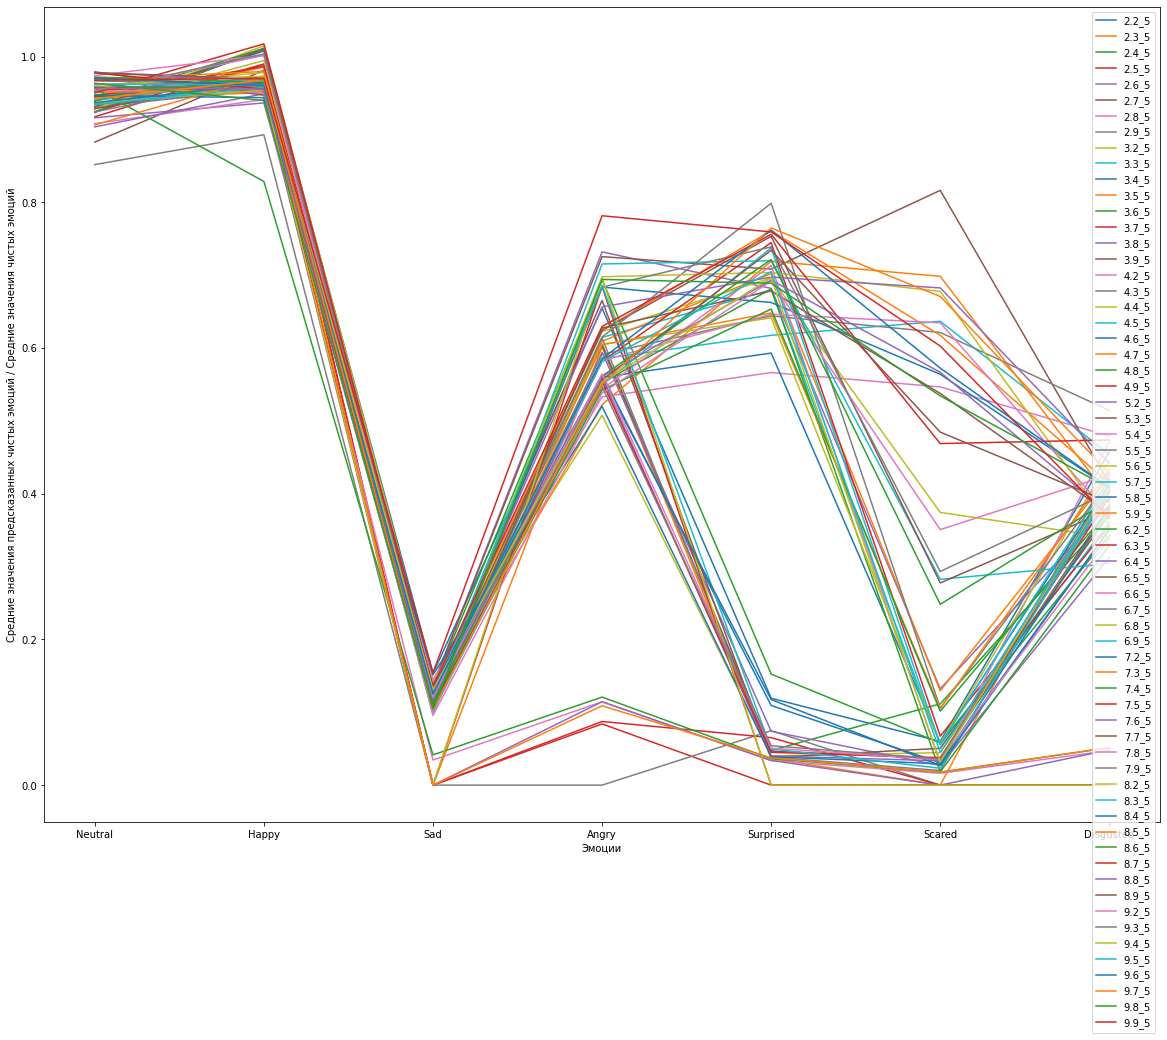

In [145]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_5,
    'scale': True
}
df_clear_metrics_5 = tools.plot_emotions(**kwargs)

In [147]:
df_clear_metrics_5.sort_values('clear')

model   Neutral     Happy           Sad         Angry     Surprised  \
7   2.9_5  0.851832  0.892825  6.589531e-17  1.088510e-10  7.470667e-02   
3   2.5_5  0.924480  0.989850  6.620400e-14  8.405525e-02  1.858834e-08   
24  5.2_5  0.903654  0.949124  2.529558e-08  1.144822e-01  3.389184e-02   
32  6.2_5  0.956568  0.828678  4.148557e-02  1.208692e-01  3.632569e-02   
13  3.7_5  0.917463  0.989547  4.818955e-10  8.737991e-02  6.514695e-02   
..    ...       ...       ...           ...           ...           ...   
31  5.9_5  0.951025  0.954402  1.318008e-01  6.245280e-01  7.610617e-01   
38  6.8_5  0.957903  0.978164  1.177911e-01  6.978711e-01  7.037555e-01   
44  7.6_5  0.970013  0.972046  1.247475e-01  6.564509e-01  6.973553e-01   
63  9.9_5  0.967642  0.970276  1.541610e-01  7.816071e-01  7.593926e-01   
15  3.9_5  0.928638  0.968159  1.368628e-01  7.254941e-01  7.082832e-01   

          Scared     Disgusted     clear  
7   1.544430e-06  1.366693e-14  0.259909  
3   8.052074e-12  1.319507e-11  0.285484  
24  2.404012e-11  4.835444e-02  0.292787  
32  1.777864e-02  5.141307e-02  0.293303  
13  4.267849e-09  1.810673e-10  0.294219  
..           ...           ...       ...  
31  6.174013e-01  4.138379e-01  0.636294  
38  6.777394e-01  3.567651e-01  0.641427  
44  6.825403e-01  4.417394e-01  0.649270  
63  6.027441e-01  3.665273e-01  0.657479  
15  8.164499e-01  4.147916e-01  0.671240  

[64 rows x 9 columns]

In [149]:
metrics

['mean', 'norm', 'stat', 'clear']

In [150]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics_5, df_clear_metrics_5)
metric_df_dict

{'mean':     model   layer    N      mean      norm      stat
 0   2.2_5  second  2.2  0.078289  0.214014  0.507822
 1   2.3_5  second  2.3  0.067130  0.182908  0.480687
 2   2.4_5  second  2.4  0.062440  0.169979  0.480935
 3   2.5_5  second  2.5  0.085538  0.249614  0.485652
 4   2.6_5  second  2.6  0.062360  0.169063  0.548877
 ..    ...     ...  ...       ...       ...       ...
 59  9.5_5  second  9.5  0.053527  0.147115  0.526611
 60  9.6_5  second  9.6  0.050940  0.140930  0.520589
 61  9.7_5  second  9.7  0.054568  0.153311  0.554506
 62  9.8_5  second  9.8  0.051190  0.142700  0.563049
 63  9.9_5  second  9.9  0.050219  0.139397  0.569504
 
 [64 rows x 6 columns],
 'norm':     model   layer    N      mean      norm      stat
 0   2.2_5  second  2.2  0.078289  0.214014  0.507822
 1   2.3_5  second  2.3  0.067130  0.182908  0.480687
 2   2.4_5  second  2.4  0.062440  0.169979  0.480935
 3   2.5_5  second  2.5  0.085538  0.249614  0.485652
 4   2.6_5  second  2.6  0.062360  0.169

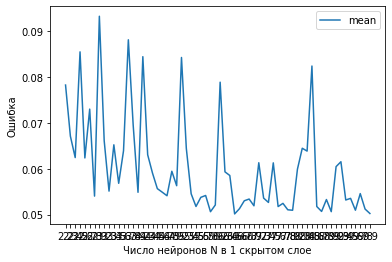

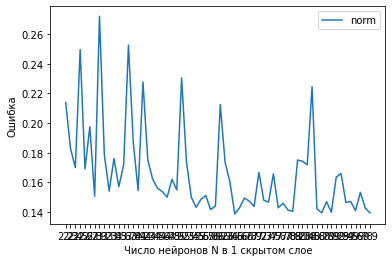

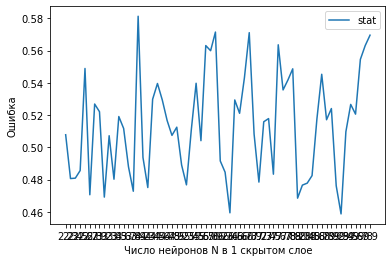

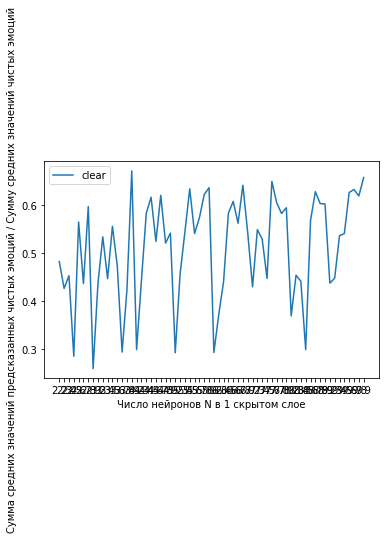

In [151]:
tools.plot_metrics(metric_df_dict)

In [152]:
models

[['2.2_5', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3_5', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4_5', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5_5', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6_5', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7_5', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8_5', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9_5', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2_5', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3_5', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4_5', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5_5', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6_5', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [153]:
v

5

In [154]:
path_to_saved_models = '../saved_models/'
layer = 'second'

In [156]:
save_models(models, path_to_saved_models, layer, v=v)

INFO:tensorflow:Assets written to: ../saved_models/second/_5/model_second_2.2_5/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_5/model_second_2.3_5/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_5/model_second_2.4_5/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_5/model_second_2.5_5/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_5/model_second_2.6_5/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_5/model_second_2.7_5/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_5/model_second_2.8_5/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_5/model_second_2.9_5/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_5/model_second_3.2_5/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_5/model_second_3.3_5/assets
INFO:tensorflow:Assets written to: ../saved_models/second/_5/model_second_3.4_5/assets
INFO:tensorflow:Assets written to: ../saved

In [157]:
models

[['2.2_5', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8238053460>],
 ['2.3_5', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f823021f100>],
 ['2.4_5', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f822276d700>],
 ['2.5_5', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f82302bf610>],
 ['2.6_5', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f8230349790>],
 ['2.7_5', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f82220408e0>],
 ['2.8_5', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f822256fac0>],
 ['2.9_5', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f8221fb90d0>],
 ['3.2_5', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f8221dfc1f0>],
 ['3.3_5', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f8221cfd820>],
 ['3.4_5', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f82226d8790>],
 ['3.5_5', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f82219e2250>],
 ['3.6_5', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f